<a href="https://colab.research.google.com/github/Minoo-eml/Statistical_Model_datascience/blob/main/Unistatistical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import math
import statistics
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn; seaborn.set()

In [ ]:
from datetime import datetime # Provides classes for manipulating dates and times
from dateutil import parser

In [ ]:
# To manually build a date, specifying the different inputs
date = datetime(year=2021, month=11, day=29,hour=11, minute=30, second=25) # the last three are optional, default is 00:00:00
print(date)
print(type(date))

# To parse a string into a datetime object  (strptime)
xmas_day = '2021-12-25'
print(datetime.strptime(xmas_day, '%Y-%m-%d'))


# Note: the dateutil module provides the parser.parse function that can automatically parse dates from a variety of string formats:

first_day = '1st of January, 2022'
last_day = '31/12/21'
random_day = 'Nov 08, 1999 10:32 AM'
random_day2 = '20180803213450'

print(parser.parse(first_day))
print(parser.parse(last_day))
print(parser.parse(random_day))
print(parser.parse(random_day2))

2021-11-29 11:30:25
<class 'datetime.datetime'>
2021-12-25 00:00:00
2022-01-01 00:00:00
2021-12-31 00:00:00
1999-11-08 10:32:00
2018-08-03 21:34:50


In [ ]:
 # Creating a timestamp object - Example 1
xmas_day = pd.to_datetime('25th of Dec, 2021') # an alternative: pd.to_datetime('12/25/21')
print(xmas_day)
print(type(xmas_day)) # Timestamp type

# If I want to convert to a string:
Year = xmas_day.strftime('%Y')
print('Year:', Year)

2021-12-25 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
Year: 2021


In [ ]:
# When passing a series of dates, pd.to_datetime() returns a DatetimeIndex, i.e. a group of Timestamp objects
dates = pd.to_datetime([datetime(2020, 12, 25), '4th of July, 2020',
                       '2018-Oct-21', '20200508', '1982/1/22'])
print(dates)
print(type(dates))
print('-----')

# Alternative way to create a DatetimeIndex
D = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-07-22'])
print(D)

DatetimeIndex(['2020-12-25', '2020-07-04', '2018-10-21', '2020-05-08',
               '1982-01-22'],
              dtype='datetime64[ns]', freq=None)
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
-----
DatetimeIndex(['2014-07-04', '2014-08-04', '2015-07-04', '2015-07-22'], dtype='datetime64[ns]', freq=None)


In [ ]:
index = pd.DatetimeIndex(['2014-07-04', '2014-03-04', '2015/07/22',
                          '7/4/99', '01/01/1900'])
data = pd.Series([10, 21, 32, 43,99], index=index)
print(index)
print('-----')
print(data)

print('-----')
print('Single element:', data.iloc[0]) # or data[0]
print('Single element with explicit indexing:', data.loc['1999-07-04'])
print('Specific year: \n', data['2014'])
print('Specific year/month: \n', data['2015-07'])

DatetimeIndex(['2014-07-04', '2014-03-04', '2015-07-22', '1999-07-04',
               '1900-01-01'],
              dtype='datetime64[ns]', freq=None)
-----
2014-07-04    10
2014-03-04    21
2015-07-22    32
1999-07-04    43
1900-01-01    99
dtype: int64
-----
Single element: 10
Single element with explicit indexing: 43
Specific year: 
 2014-07-04    10
2014-03-04    21
dtype: int64
Specific year/month: 
 2015-07-22    32
dtype: int64


In [ ]:
# To convert a DatetimeIndex to a Period object, frequency has to be specified
dates = pd.to_datetime(['2013-02-02', '2012-01-02', '2015-11-30'])
print(dates) # DatetimeIndex object
print('-------------')

period_daily = dates.to_period('D') # create daily time periods, PeriodIndex object
print('Day:', period_daily)
print('-------------')
period_weekly = dates.to_period('W') # create weekly time periods
print('Week:', period_weekly)
print('-------------')
period_monthly = dates.to_period('M') # create monthly time periods
print('Month:', period_monthly)
print('-------------')
period_yearly = dates.to_period('Y') # create yearly time periods
print('Year:', period_yearly)

# Start/end time of a Period or other operations can be done on these PeriodIndex objects
Stime = period_weekly.start_time # becomes a DatetimeIndex object
Etime = period_monthly.end_time


DatetimeIndex(['2013-02-02', '2012-01-02', '2015-11-30'], dtype='datetime64[ns]', freq=None)
-------------
Day: PeriodIndex(['2013-02-02', '2012-01-02', '2015-11-30'], dtype='period[D]')
-------------
Week: PeriodIndex(['2013-01-28/2013-02-03', '2012-01-02/2012-01-08',
             '2015-11-30/2015-12-06'],
            dtype='period[W-SUN]')
-------------
Month: PeriodIndex(['2013-02', '2012-01', '2015-11'], dtype='period[M]')
-------------
Year: PeriodIndex(['2013', '2012', '2015'], dtype='period[A-DEC]')


In [ ]:
# A TimedeltaIndex is given by the temporal difference between a DatetimeIndex and Timestamp objects
dates = pd.to_datetime([datetime(2020, 12, 25), '31st of December, 1990',
                       '2018-Oct-6', '07-07-2017', '20200508', '20200422T203448']) #DatetimeIndex
dates_v2 = pd.to_datetime('2019-09-15') # Timestamp

Difference = dates-dates_v2
print(Difference)
print('----------')
Difference_2 = dates[2] - dates_v2
print(Difference_2)
print(type(Difference_2))



TimedeltaIndex([    '467 days 00:00:00', '-10485 days +00:00:00',
                  '-344 days +00:00:00',   '-800 days +00:00:00',
                    '236 days 00:00:00',     '220 days 20:34:48'],
               dtype='timedelta64[ns]', freq=None)
----------
-344 days +00:00:00
<class 'pandas._libs.tslibs.timedeltas.Timedelta'>


In [ ]:
# 1. Simple sequence of Dates by specifying start/end: by default, the frequency is daily (output type is DatetimeIndex)
day = pd.date_range('2021-08-01', '2021-08-10', freq='B') # B for business day only
week = pd.date_range('2021-08-01', '2021-08-10',freq='W') # W weekly frequency
month = pd.date_range('2021-08-01', '2021-10-31',freq='M') # M monthly frequency

print(day)
print(week)
print(month)

# Note: a complete list of frequencies that can be used is provided at this link: https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries-offset-aliases

DatetimeIndex(['2021-08-02', '2021-08-03', '2021-08-04', '2021-08-05',
               '2021-08-06', '2021-08-09', '2021-08-10'],
              dtype='datetime64[ns]', freq='B')
DatetimeIndex(['2021-08-01', '2021-08-08'], dtype='datetime64[ns]', freq='W-SUN')
DatetimeIndex(['2021-08-31', '2021-09-30', '2021-10-31'], dtype='datetime64[ns]', freq='M')


In [ ]:
# 2. Sequence of Dates by specifying Period: date range is specified with a start point and number of periods (to set the number of samples)
date_rng_d = pd.date_range('01-01-1900 10:15', periods=5) # default daily frequency
print(date_rng_d)

date_rng_m = pd.date_range('01-01-1900 10:15', periods=5, freq='M') #M = last day of the month
print(date_rng_m)

date_rng_ms = pd.date_range('01-01-1900 10:15', periods=5, freq='MS') # MS = month start
print(date_rng_ms)

test = pd.date_range('2020-02-03 10:15', periods=8, freq = 'W')
print(test)

DatetimeIndex(['1900-01-01 10:15:00', '1900-01-02 10:15:00',
               '1900-01-03 10:15:00', '1900-01-04 10:15:00',
               '1900-01-05 10:15:00'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['1900-01-31 10:15:00', '1900-02-28 10:15:00',
               '1900-03-31 10:15:00', '1900-04-30 10:15:00',
               '1900-05-31 10:15:00'],
              dtype='datetime64[ns]', freq='M')
DatetimeIndex(['1900-01-01 10:15:00', '1900-02-01 10:15:00',
               '1900-03-01 10:15:00', '1900-04-01 10:15:00',
               '1900-05-01 10:15:00'],
              dtype='datetime64[ns]', freq='MS')
DatetimeIndex(['2020-02-09 10:15:00', '2020-02-16 10:15:00',
               '2020-02-23 10:15:00', '2020-03-01 10:15:00',
               '2020-03-08 10:15:00', '2020-03-15 10:15:00',
               '2020-03-22 10:15:00', '2020-03-29 10:15:00'],
              dtype='datetime64[ns]', freq='W-SUN')


In [ ]:
# Note: date_range() output can be used as index in a Series object or in a DataFrame
# Series example
rng = pd.date_range('2016 Jul 1', periods = 10, freq = 'D')
rng
Series1 = pd.Series(list(range(len(rng))), index = rng)
print(Series1)
print('-------')

# DataFrame example
np.random.seed(42)
DF1 = pd.DataFrame(60*np.random.rand(10,1), # random samples from a uniform distribution over [0, 1), the dimension of the output has to be specified
             columns=['Values'], index=rng)
DF1

# As alternative, we can have our default values for index, and then set the index to the rng values
# DF1 = pd.DataFrame(60*np.random.rand(10,1),
#             columns=['Values'])
# DF1.set_index(rng, inplace=True)
# DF1.index # DatetimeIndex

2016-07-01    0
2016-07-02    1
2016-07-03    2
2016-07-04    3
2016-07-05    4
2016-07-06    5
2016-07-07    6
2016-07-08    7
2016-07-09    8
2016-07-10    9
Freq: D, dtype: int64
-------


Values
2016-07-01  22.472407
2016-07-02  57.042858
2016-07-03  43.919637
2016-07-04  35.919509
2016-07-05   9.361118
2016-07-06   9.359671
2016-07-07   3.485017
2016-07-08  51.970569
2016-07-09  36.066901
2016-07-10  42.484355

In [ ]:
# Create a period (interval) specifying the starting point and the number of periods
A = pd.period_range('2020-02-03', periods=8, freq='D')
print('A (Year):',A)
print('-----------')
B = pd.period_range('2020-02-03', periods=8, freq='M')
print('B (Month):',B)
print('-----------')
C = pd.period_range('2020-02-03', periods=8, freq='W')
print('C (Week):',C)
print('-----------')
D = pd.period_range('2020-02-03', periods=8, freq='10H')
print('D (10 Hours):',D)
print('-----------')


# Remember: Period represents an interval in time, whereas Timestamp/DatetimeIndex represents a point in time.

A (Year): PeriodIndex(['2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
             '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10'],
            dtype='period[D]')
-----------
B (Month): PeriodIndex(['2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07',
             '2020-08', '2020-09'],
            dtype='period[M]')
-----------
C (Week): PeriodIndex(['2020-02-03/2020-02-09', '2020-02-10/2020-02-16',
             '2020-02-17/2020-02-23', '2020-02-24/2020-03-01',
             '2020-03-02/2020-03-08', '2020-03-09/2020-03-15',
             '2020-03-16/2020-03-22', '2020-03-23/2020-03-29'],
            dtype='period[W-SUN]')
-----------
D (10 Hours): PeriodIndex(['2020-02-03 00:00', '2020-02-03 10:00', '2020-02-03 20:00',
             '2020-02-04 06:00', '2020-02-04 16:00', '2020-02-05 02:00',
             '2020-02-05 12:00', '2020-02-05 22:00'],
            dtype='period[10H]')
-----------


In [ ]:
# As these are PeriodIndex object, we can print start and end times:
print('Start time period at index 0: ', A[0].start_time) # if I do not specify the index this operation will be repeated for all the elements
print('End time period at index 0: ', A[0].end_time)

Start time period at index 0:  2020-02-03 00:00:00
End time period at index 0:  2020-02-03 23:59:59.999999999


In [ ]:
A = pd.timedelta_range(start='10 days', periods=5)
C = pd.timedelta_range('2 hours', freq='30T', periods=10)
print(A)
print(C)

TimedeltaIndex(['10 days', '11 days', '12 days', '13 days', '14 days'], dtype='timedelta64[ns]', freq='D')
TimedeltaIndex(['0 days 02:00:00', '0 days 02:30:00', '0 days 03:00:00',
                '0 days 03:30:00', '0 days 04:00:00', '0 days 04:30:00',
                '0 days 05:00:00', '0 days 05:30:00', '0 days 06:00:00',
                '0 days 06:30:00'],
               dtype='timedelta64[ns]', freq='30T')


In [ ]:
# These example data are part of the European Commission database. They represent government data, related in particular to
# educational fundings by the member states.
# In a delimiter-separated value file, as a CSV file, each line is a data record and each record consists of one (or more) fields, separated by the
# delimiter character (usually a comma or semicolon).

edu = pd.read_csv('/content/education_Data.csv', na_values=':',sep=';',usecols=['TIME','GEO','Value'])
display(edu)
print('-------')
display(type(edu)) # DataFrame
display(edu.dtypes) # To check the data type of each column

# Remember: if we have loaded several columns and want to delete some of them:
# edu.drop(columns=['GEO'],inplace=True)

TIME                            GEO  Value
0    2000  European Union (28 countries)    NaN
1    2001  European Union (28 countries)    NaN
2    2002  European Union (28 countries)   5.00
3    2003  European Union (28 countries)   5.03
4    2004  European Union (28 countries)   4.95
..    ...                            ...    ...
379  2007                        Finland   5.90
380  2008                        Finland   6.10
381  2009                        Finland   6.81
382  2010                        Finland   6.85
383  2011                        Finland   6.76

[384 rows x 3 columns]

-------


pandas.core.frame.DataFrame

TIME       int64
GEO       object
Value    float64
dtype: object

In [ ]:
print('Columns:', edu.columns)
print('')
print('Indexes:', edu.index)
print('')
print('Values:', edu.values)

Columns: Index(['TIME', 'GEO', 'Value'], dtype='object')

Indexes: RangeIndex(start=0, stop=384, step=1)

Values: [[2000 'European Union (28 countries)' nan]
 [2001 'European Union (28 countries)' nan]
 [2002 'European Union (28 countries)' 5.0]
 ...
 [2009 'Finland' 6.81]
 [2010 'Finland' 6.85]
 [2011 'Finland' 6.76]]


# ** 3 ----------------------------------------------------**

In [ ]:
import numpy as np
import pandas as pd
import math
import statistics
from scipy import stats
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# Specific importing
from pandas.plotting import lag_plot
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Example 1 - Temperature data
temperature_data = pd.read_csv('/content/Temperature.csv', na_values='',sep=';',header=None,names=['Date', 'Temp'], parse_dates=['Date'], index_col = 'Date')
display(temperature_data)

Temp
Date            
2012-01-01  11.1
2012-01-02  10.2
2012-01-03   1.7
2012-01-04  -2.0
2012-01-05   3.9
...          ...
2012-12-27   8.4
2012-12-28   2.8
2012-12-29   3.0
2012-12-30  -1.1
2012-12-31   1.1

[366 rows x 1 columns]

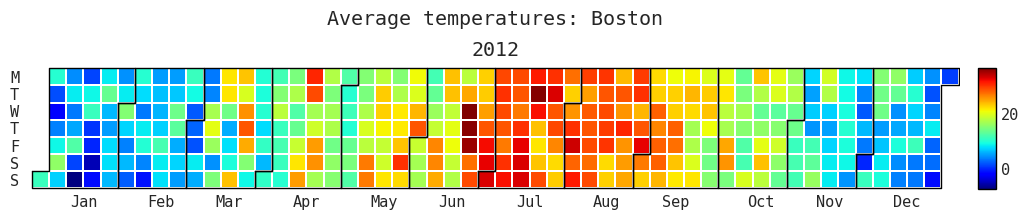

In [ ]:
!pip install july   # For defining heatmaps with days and months
import july # Similar package calplot
july.heatmap(temperature_data.index, temperature_data['Temp'].values, cmap='jet', colorbar=True, title='Average temperatures: Boston',month_grid=True);
# Note: if we add "value_label=True" we will visualise the value itself in each cell


In [ ]:
# Example 2 - Data on house sale prices for King County (America), for homes sold between May 2014-May 2015
houses = pd.read_csv('/content/kc_house_data.csv', na_values='',sep=',', parse_dates=['date'])
display(houses)

id       date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520 2014-10-13  221900.0         3       1.00         1180   
1      6414100192 2014-12-09  538000.0         3       2.25         2570   
2      5631500400 2015-02-25  180000.0         2       1.00          770   
3      2487200875 2014-12-09  604000.0         4       3.00         1960   
4      1954400510 2015-02-18  510000.0         3       2.00         1680   
...           ...        ...       ...       ...        ...          ...   
21608   263000018 2014-05-21  360000.0         3       2.50         1530   
21609  6600060120 2015-02-23  400000.0         4       2.50         2310   
21610  1523300141 2014-06-23  402101.0         2       0.75         1020   
21611   291310100 2015-01-16  400000.0         3       2.50         1600   
21612  1523300157 2014-10-15  325000.0         2       0.75         1020   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
0          5650     1.0           0     0  ...      7        1180   
1          7242     2.0           0     0  ...      7        2170   
2         10000     1.0           0     0  ...      6         770   
3          5000     1.0           0     0  ...      7        1050   
4          8080     1.0           0     0  ...      8        1680   
...         ...     ...         ...   ...  ...    ...         ...   
21608      1131     3.0           0     0  ...      8        1530   
21609      5813     2.0           0     0  ...      8        2310   
21610      1350     2.0           0     0  ...      7        1020   
21611      2388     2.0           0     0  ...      8        1600   
21612      1076     2.0           0     0  ...      7        1020   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0                  0      1955             0    98178  47.5112 -122.257   
1                400      1951          1991    98125  47.7210 -122.319   
2                  0      1933             0    98028  47.7379 -122.233   
3                910      1965             0    98136  47.5208 -122.393   
4                  0      1987             0    98074  47.6168 -122.045   
...              ...       ...           ...      ...      ...      ...   
21608              0      2009             0    98103  47.6993 -122.346   
21609              0      2014             0    98146  47.5107 -122.362   
21610              0      2009             0    98144  47.5944 -122.299   
21611              0      2004             0    98027  47.5345 -122.069   
21612              0      2008             0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
0               1340        5650  
1               1690        7639  
2               2720        8062  
3               1360        5000  
4               1800        7503  
...              ...         ...  
21608           1530        1509  
21609           1830        7200  
21610           1020        2007  
21611           1410        1287  
21612           1020        1357  

[21613 rows x 21 columns]

In [ ]:
# Heatmap to visualise the total number of houses sold per year/condition
houses_year_cond = pd.pivot_table(houses, values = 'id',index='condition', columns='yr_built',aggfunc='count')
display(houses_year_cond)
sns.heatmap(houses_year_cond, cmap='hot');

yr_built   1900  1901  1902  1903  1904  1905  1906  1907  1908  1909  ...  \
condition                                                              ...   
1           2.0   1.0   NaN   NaN   NaN   NaN   NaN   NaN   1.0   NaN  ...   
2           2.0   NaN   NaN   1.0   NaN   1.0   6.0   NaN   1.0   NaN  ...   
3          44.0  13.0  15.0  28.0  21.0  38.0  34.0  33.0  35.0  36.0  ...   
4          26.0   9.0   7.0  10.0  12.0  12.0  36.0  21.0  29.0  38.0  ...   
5          13.0   6.0   5.0   7.0  12.0  23.0  16.0  11.0  20.0  20.0  ...   

yr_built    2006   2007   2008   2009   2010   2011   2012   2013   2014  2015  
condition                                                                       
1            NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   NaN  
2            NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   NaN  
3          450.0  417.0  366.0  229.0  143.0  130.0  170.0  201.0  559.0  38.0  
4            4.0    NaN    1.0    1.0    NaN    NaN    NaN    NaN    NaN   NaN  
5            NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   NaN  

[5 rows x 116 columns]

In [ ]:
# Example 1 - Temperature data
temp = pd.read_csv('/content/daily-min-temperatures.csv', na_values='', sep = ';', parse_dates= ['Date'], index_col='Date', dayfirst=True)
temp['Period'] = temp.index.to_period('Y') # Add one colum to indicate the year (DatetimeIndex -> PeriodIndex)
display(temp)


Temp Period
Date                   
1981-01-01  20.7   1981
1981-01-02  17.9   1981
1981-01-03  18.8   1981
1981-01-04  14.6   1981
1981-01-05  15.8   1981
...          ...    ...
1990-12-27  14.0   1990
1990-12-28  13.6   1990
1990-12-29  13.5   1990
1990-12-30  15.7   1990
1990-12-31  13.0   1990

[3650 rows x 2 columns]

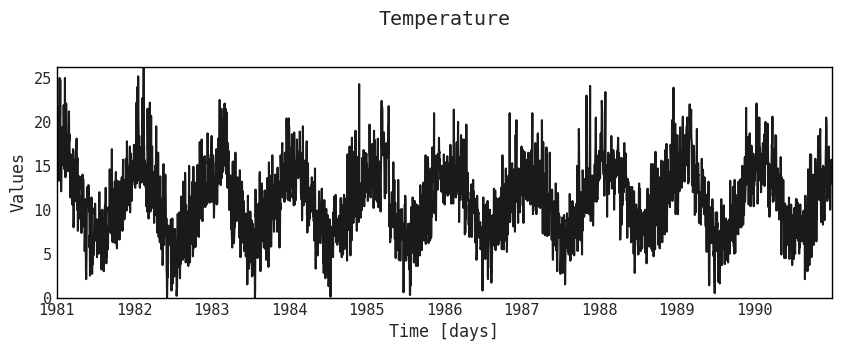

In [ ]:
# Simple time plot for visualising the min temperature information
plt.figure(figsize=(10,3))
plt.grid()
plt.plot(temp['Temp'],'k-')
plt.title('Temperature')
plt.xlabel('Time [days]')
plt.ylabel('Values');

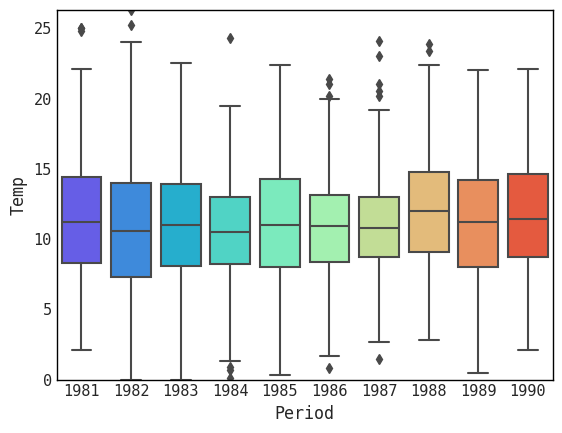

In [ ]:
# Boxplot representing the temperature data for each year
sns.boxplot(x=temp['Period'], y = temp['Temp'],palette='rainbow');

Temp   Period
Date                     
1990-01-01  14.8  1990-01
1990-01-02  13.3  1990-01
1990-01-03  15.6  1990-01
1990-01-04  14.5  1990-01
1990-01-05  14.3  1990-01
...          ...      ...
1990-12-27  14.0  1990-12
1990-12-28  13.6  1990-12
1990-12-29  13.5  1990-12
1990-12-30  15.7  1990-12
1990-12-31  13.0  1990-12

[365 rows x 2 columns]

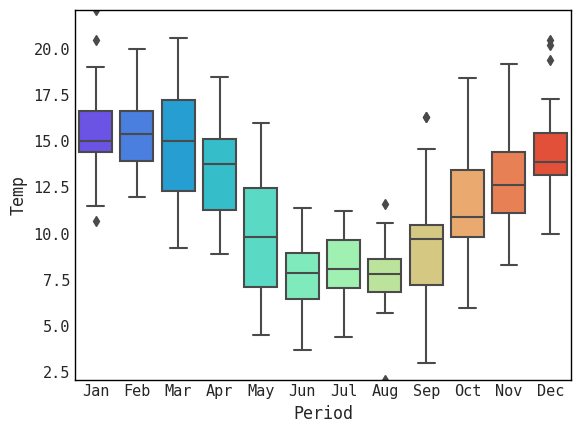

In [ ]:
# Boxplot representing the monthly temperature data for a specific year
temp_year = temp.loc['1990-01-01':'1990-12-31',:]
temp_year['Period'] = temp_year.index.to_period('M')
display(temp_year)

# Note: For Series type, we can use dt.strftime() function to do the conversion using specified date_format
# For example, '%b' - Month name, %m - Month number
sns.boxplot(x=temp_year['Period'].dt.strftime('%b'),y = temp_year['Temp'], palette='rainbow');


In [ ]:
# Violin plot
sns.violinplot(x=temp_year['Period'].dt.strftime('%b'),y = temp_year['Temp'], palette='rainbow');

Outliers: [10, 1000]


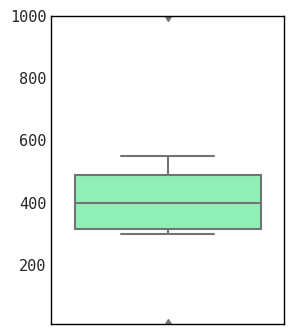

In [ ]:
# Note: IQR for defining an outlier

P = [10,300,450,470,550,350,320,1000]
Q1_py = np.quantile(P,0.25)
Q3_py = np.quantile(P,0.75)
IQR = Q3_py-Q1_py
Lower_Fence = Q1_py - 1.5*IQR
Upper_Fence = Q3_py + 1.5*IQR

T = []
for i in P:
    exp1 = i < Lower_Fence
    exp2 = i > Upper_Fence
    if exp1 or exp2:
       temp = i
       T.append(temp)

print('Outliers:', T)

plt.figure(figsize=(3,4))
ax = sns.boxplot(y = P, palette='rainbow');
ax.grid()

Number of outliers: 27
Number of non-outliers: 9973


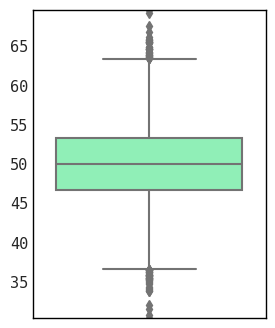

In [ ]:
# Standard deviation approach for defining outliers
np.random.seed(42)
P = 5 * np.random.randn(10000) + 50

mean_value = np.mean(P)
sd_value = np.std(P)
thr = 3*sd_value
Lower = mean_value - thr
Upper = mean_value + thr

outliers = [i for i in P if i < Lower or i > Upper]
print('Number of outliers:', len(outliers))

P_no_outliers = [i for i in P if i > Lower and i < Upper]
print('Number of non-outliers:', len(P_no_outliers))

plt.figure(figsize=(3,4))
ax = sns.boxplot(y = P, palette='rainbow');
ax.grid()

In [ ]:
# Example 1 - Temperature data (Yearly and Monthly)
# Barplot
temp = pd.read_csv('/content/daily-min-temperatures.csv', na_values='', sep = ';', parse_dates= ['Date'], index_col='Date', dayfirst=True)
temp['Period'] = temp.index.to_period('Y') # Add one colum to indicate the year (DatetimeIndex -> PeriodIndex)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(ax = axes[0], x=temp['Period'].dt.strftime('%Y'), y= temp['Temp'],palette='autumn',errorbar=('se'),capsize=0.01,estimator='mean')
axes[0].set_title('Yearly Data', fontsize=12)
axes[0].grid()

sns.barplot(ax = axes[1], x=temp_year['Period'].dt.strftime('%b'), y= temp_year['Temp'],palette='autumn',errorbar=('se'),capsize=0.01,estimator='mean')
axes[1].set_title('Monthly Data - 1981', fontsize=12)
axes[1].grid();


In [ ]:
# Histogram - Counts/Frequency (Daily data for 1981)
n, bins, patches = plt.hist(temp_year['Temp'], bins = 20, density=False) # n = the number of points in a given bin
plt.grid()
print('The total counts is', sum(n)) # sum of the bins heights

The total counts is 365.0


The total area is 0.9999999999999999


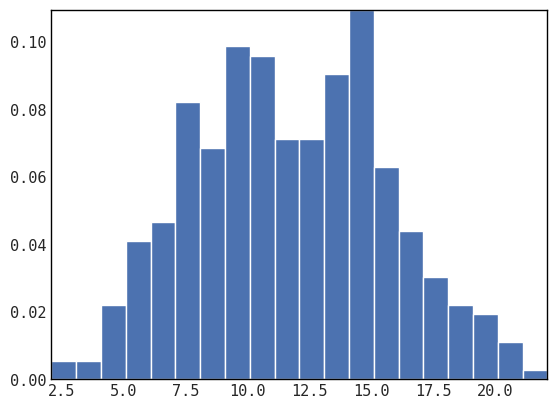

In [ ]:
# Histogram -  Density
n, bins, patches = plt.hist(temp_year['Temp'], bins = 20, density=True) # n = count_bin/(width_bin*total_counts)
plt.grid()
a = np.diff(bins) # to get the width of each bin
print('The total area is', sum(n*a[0])) # sum of the bins' areas

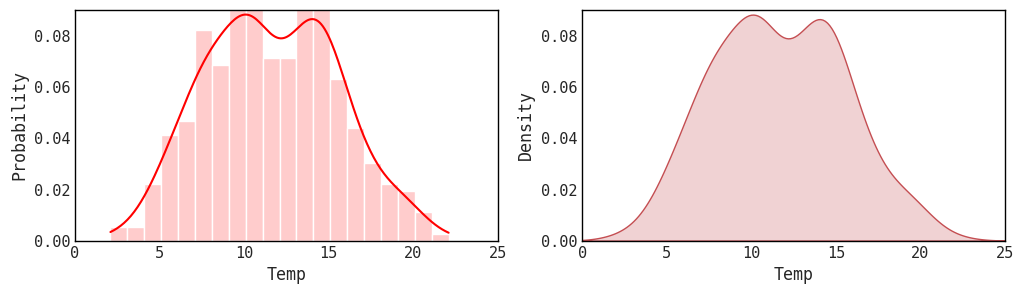

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 3))
sns.histplot(temp_year['Temp'],kde=True,color='red',alpha=0.2,stat='probability',binwidth=1,fill=True, ax=axes[0]);
axes[0].grid()
axes[0].set_xlim([0, 25]);
axes[0].set_ylim([0, 0.09]);

sns.kdeplot(temp_year['Temp'],color='r', shade=True, ax=axes[1])
axes[1].grid()
axes[1].set_xlim([0, 25]);
axes[1].set_ylim([0, 0.09]);

In [ ]:
# Load the data and check the dimensions
Ab_pASL_Yeo_Average = np.loadtxt('/content/Ab_pASL_Yeo_Average (1).txt')
nr, nc = Ab_pASL_Yeo_Average.shape
display(nr,nc)

# Time courses for signals 3-4
plt.figure(1)
plt.plot(Ab_pASL_Yeo_Average[:,2],'r',linewidth=2)
plt.plot(Ab_pASL_Yeo_Average[:,3],'b',linewidth=2)
plt.xlim([0, 200])
plt.grid(True)
plt.title('Original signals - 3 & 4')

# Time courses for demeaned signals 3-4
plt.figure(2)
plt.plot(Ab_pASL_Yeo_Average[:,2]-np.mean(Ab_pASL_Yeo_Average[:,2]),'r',linewidth=2)
plt.plot(Ab_pASL_Yeo_Average[:,3]-np.mean(Ab_pASL_Yeo_Average[:,3]),'b',linewidth=2)
plt.xlim([0, 200])
plt.grid(True)
plt.title('Demeaned signals - 3 & 4');


200

100

In [ ]:
# Calculate the correlation coefficient for each pair of time courses, and then the covariance

# "Long" solution
#T = np.zeros((nc, nc))
#for i in range(nc):
#    for j in range(nc):
#        T[i, j] = np.corrcoef(Ab_pASL_Yeo_Average[:, i], Ab_pASL_Yeo_Average[:, j])[0, 1]

#plt.figure(4)
#sns.heatmap(T, cmap='jet',vmin=0, vmax=1,ax=axs[0])

matrice_corr = np.corrcoef(Ab_pASL_Yeo_Average, rowvar=False)
matrice_cov = np.cov(Ab_pASL_Yeo_Average, rowvar=False)

In [ ]:
# Visualize the two resulting matrices using the most appropriate graph.
fig,axs = plt.subplots(1,2,figsize=(15,5))
sns.heatmap(matrice_corr, cmap='jet',vmin=0, vmax=1,ax=axs[0])
sns.heatmap(matrice_cov, cmap='jet',vmin=matrice_cov.min(), vmax=matrice_cov.max(),ax=axs[1]);

In [ ]:
sns.violinplot(y = matrice_corr,palette='rainbow')


<Axes: >

In [ ]:
# Calculate the correlation between the two matrices
index_corr  = stats.pearsonr(np.reshape(matrice_corr,(10000,)), np.reshape(matrice_cov,(10000,)))
display(index_corr)

PearsonRResult(statistic=0.7105949031652758, pvalue=0.0)

In [ ]:
# Example with yearly data on Australian beer production
df = pd.read_csv('/content/Australian_Beer_production.csv', na_values='',sep=';', parse_dates=['time'],index_col='time')
signal = df['value']
plt.plot(signal,marker='.')
plt.grid()
plt.xlabel('Time')
plt.ylabel('Values');


In [ ]:
# Lagged version of the original signal
mysignals = [{'name': 'Lag0', 'y': signal,'color':'g', 'linewidth':2},
              {'name': 'Lag1', 'y': signal.shift(1),'color':'r', 'linewidth':2},
            {'name': 'Lag2', 'y':  signal.shift(2),'color':'b', 'linewidth':2}]

fig, ax = plt.subplots(figsize=(6,5))
for line_lag in mysignals:
    ax.plot(line_lag['y'],
            color=line_lag['color'],
            linewidth=line_lag['linewidth'],
            label=line_lag['name'])

ax.grid()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title('Representative Lags');

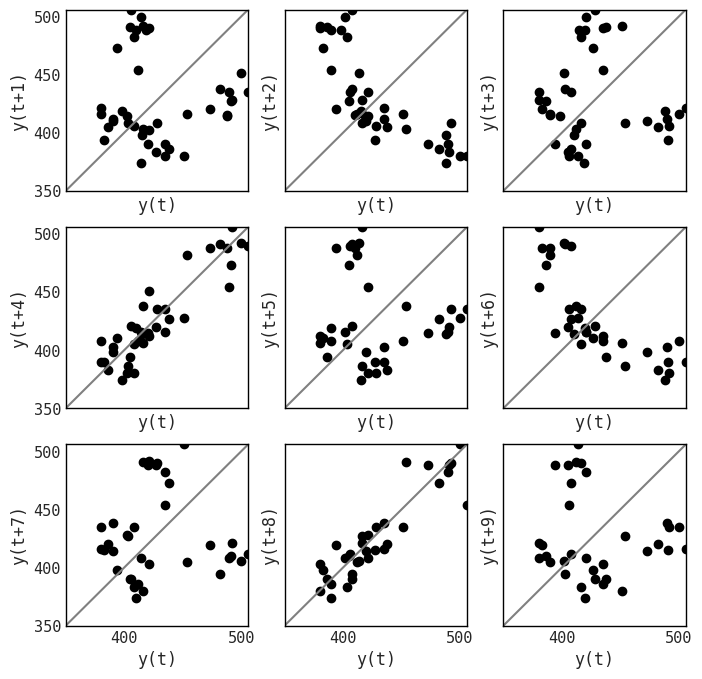

In [ ]:
# Lag plots
fig, axes = plt.subplots(3,3, sharex=True, sharey=True, figsize=(8,8))

for i, ax in enumerate(axes.flatten()[:9]):
    pd.plotting.lag_plot(signal, lag=i+1, ax=ax, c='black')
    ax.grid()
    ax.set_xlabel('y(t)')
    ax.set_ylabel('y(t+'+str(i+1)+')')
    pt = (350, 350)
    ax.axline(pt, slope=1, color='gray')



# **Autocorrelaton**

In [ ]:
# Example 1 - Simulated Signal
a = pd.Series([10, 15, 30, 40, 60])
b = a.shift(1)[1:]
display(a)
display(b)


0    10
1    15
2    30
3    40
4    60
dtype: int64

1    10.0
2    15.0
3    30.0
4    40.0
dtype: float64

In [ ]:
# General simple equation to calculate the autocorrelation
a2 = a[1:]-np.mean(a)
b2 = b-np.mean(a)
den = a-np.mean(a)
res = sum(a2*b2)/sum(den**2)
display(res)

# Double check with automatic Python function:
val = acf(a,nlags=4)
display(val)

0.3728395061728395

array([ 1.        ,  0.37283951, -0.09382716, -0.40308642, -0.37592593])

In [ ]:
# Automatic plot of the ACF function for the previous signal (Australian beer production)
fig, ax = plt.subplots(figsize=(8,3))
plot_acf(signal, lags=9,ax=ax)
ax.grid()

# Note: to retrieve the raw values resulting from this operation, we can use acf():
val = acf(signal,nlags=9)
display(val)

# val1 indicates how successive values of the signals relate to each other
# val2 indicates how signal values 2 period aparts relate to each other

array([ 1.        , -0.05298108, -0.75817544, -0.02623376,  0.80220453,
       -0.0774712 , -0.65745127,  0.00119492,  0.70725408, -0.08875626])

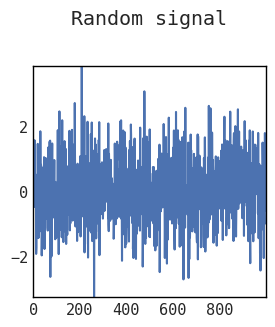

In [ ]:
# white noise
# Random signal and Lag plot
np.random.seed(42)

mean = 0
std = 1
num_samples = 1000
samples = pd.Series(np.random.normal(mean, std, size=num_samples))

fig, axes = plt.subplots(figsize=(3,3))
plt.plot(samples)
plt.grid()
plt.title('Random signal')

fig, axes = plt.subplots(3,3, sharex=True, sharey=True, figsize=(8,8))

for i, ax in enumerate(axes.flatten()[:9]):
    pd.plotting.lag_plot(samples, lag=i+1, ax=ax, c='black')
    ax.grid()
    ax.set_xlabel('y(t)')
    ax.set_ylabel('y(t+'+str(i+1)+')')
    pt = (-4, -4)
    ax.axline(pt, slope=1, color='gray')

In [ ]:
# Autocorrelation of the random signal
fig, ax = plt.subplots(figsize=(8,4))
plot_acf(samples, lags=9,ax=ax)
ax.grid()

val = acf(samples,nlags=9)
display(val)

array([ 1.00000000e+00, -7.47776769e-03, -2.32989804e-04,  1.61719885e-02,
       -5.42323823e-02,  2.58165932e-02,  1.43284233e-02,  1.22522388e-02,
       -4.90697469e-02,  2.73701884e-02])

# Example

Date
2004-09-01    3.227901
2004-10-01    4.748203
2004-11-01    4.532511
2004-12-01    4.801752
2005-01-01    4.872238
2005-02-01    4.682200
Name: Adj Close, dtype: float64

'Dimension: '

(148,)

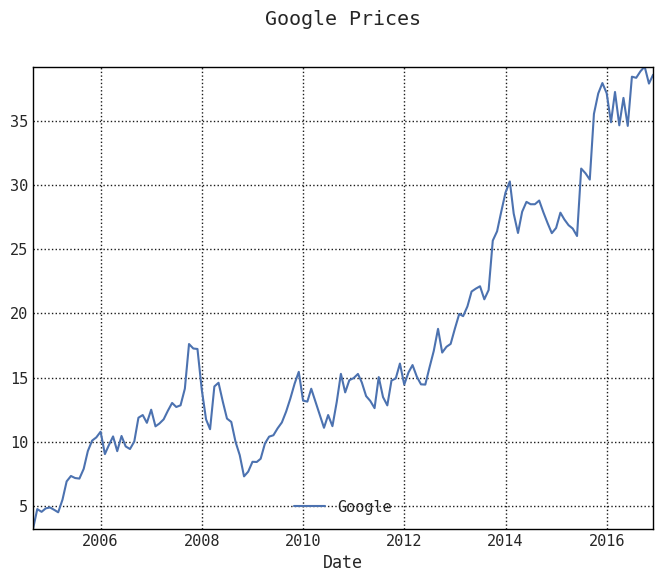

In [ ]:
!pip install yfinance
import yfinance as yf

stocks = ['GOOG']
data_dw = yf.download(tickers=stocks, start = '2004-01-01',end='2016-12-31',interval='1mo',progress=False)
data = data_dw['Adj Close']
display(data.head(6))
display('Dimension: ', data.shape)

# Simple time plots
from matplotlib import rcParams
rcParams['figure.figsize'] = 8,6
plt.plot(data, label='Google')
plt.grid(True, color='k', linestyle=':')
plt.title("Google Prices")
plt.xlabel("Date")
plt.legend(frameon=False, loc='lower center');

array([1.        , 0.96429317, 0.93185918, 0.89696545, 0.86422102,
       0.83264633, 0.79853234, 0.77241969, 0.74215889, 0.7168637 ,
       0.68612433, 0.65781244, 0.62790781])

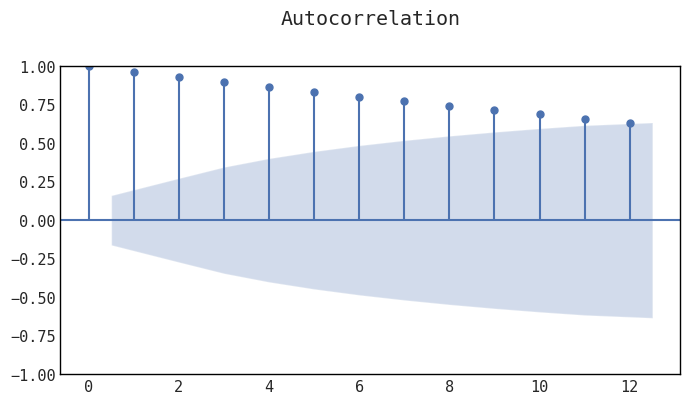

In [ ]:
# Plot ACF and corresponding values
fig, ax = plt.subplots(figsize=(8,4))
plot_acf(data, lags=12,ax=ax)
ax.grid()

val = acf(data,nlags=12)
display(val)

Text(0.5, 0, 'Date')

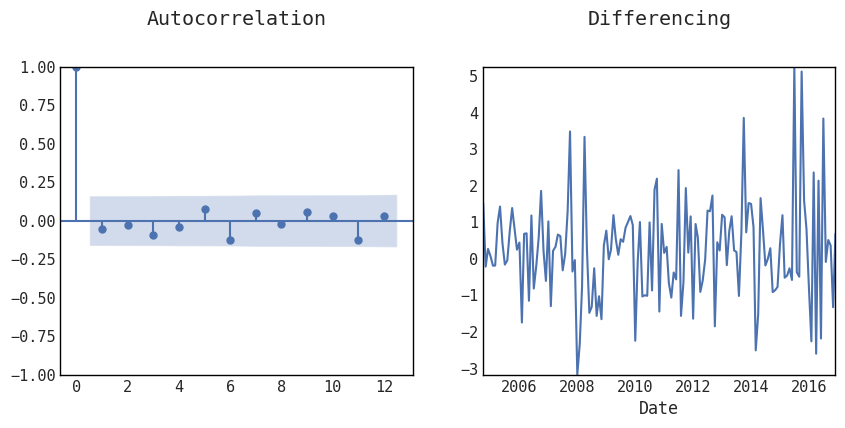

In [ ]:
# Differencing and visualization
returns = data.diff(1)
returns.dropna(inplace=True)
fig, ax = plt.subplots(1,2,figsize=(10,4))
ax[0].grid()
plot_acf(returns, lags=12,ax=ax[0])

ax[1].plot(returns)
ax[1].grid()
plt.title("Differencing")
plt.xlabel("Date")


In [ ]:
# Load the data, dropping all the rows with NaN values and the Wind+Solar column
energy = pd.read_csv('/content/Energy_consumption.csv', na_values='',sep=',',parse_dates=['Date'], index_col='Date')
energy.drop(columns=['Wind_Solar'], inplace=True)
energy.dropna(axis=0,inplace=True)
display(energy)
display(energy.dtypes)

Consumption     Wind   Solar
Date                                    
2012-01-01    948.12800  227.465   6.587
2012-01-02   1269.58100  207.327   6.574
2012-01-03   1334.74500  473.468  24.679
2012-01-04   1347.13600  499.804  14.681
2012-01-05   1376.65800  523.851   5.071
...                 ...      ...     ...
2017-12-27   1263.94091  394.507  16.530
2017-12-28   1299.86398  506.424  14.162
2017-12-29   1295.08753  584.277  29.854
2017-12-30   1215.44897  721.247   7.467
2017-12-31   1107.11488  721.176  19.980

[2187 rows x 3 columns]

Consumption    float64
Wind           float64
Solar          float64
dtype: object

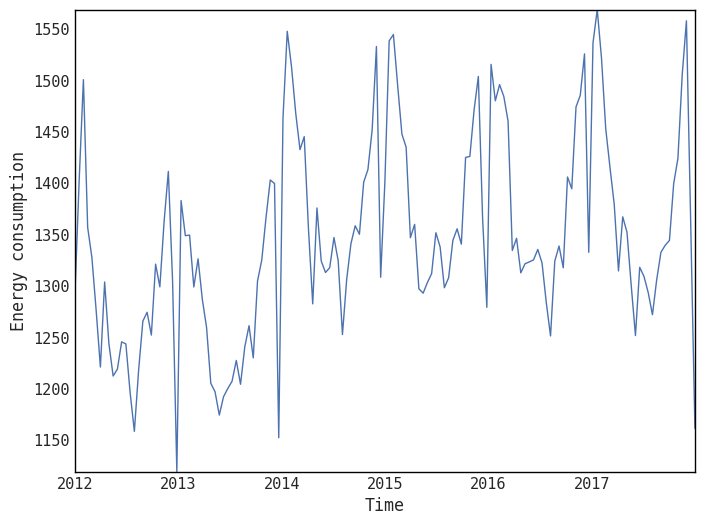

In [ ]:
# Resample the dates with a frequency of 15 days, taking mean as aggregator, and visualise the time course of the total Consumption over years
T = energy.resample('15d').mean()
plt.plot(T['Consumption'],linewidth=1)
plt.xlim(T.index.min(), T.index.max())
plt.grid()
plt.xlabel('Time')
plt.ylabel('Energy consumption');


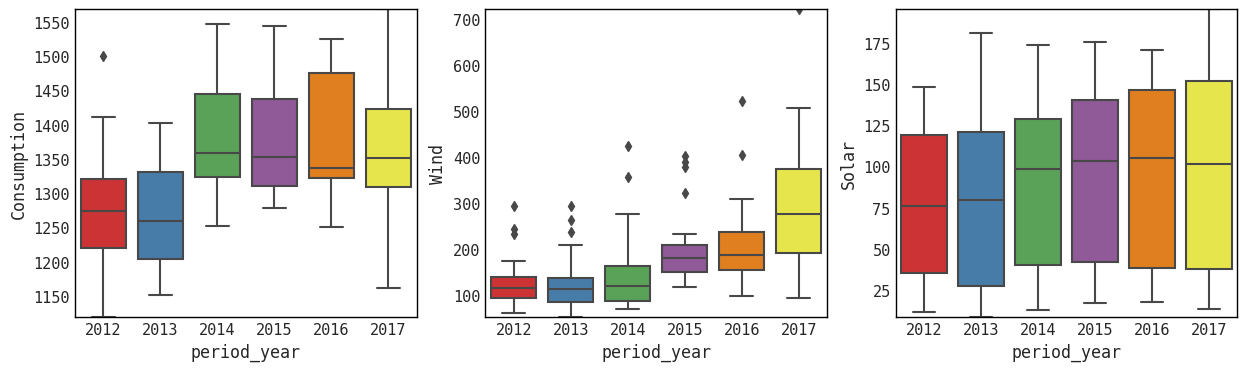

In [ ]:
# Prepare a figure with three subplots. In each subplot, illustrate the distribution of the total Consumption, Wind and Solar production values, respectively,
# grouped by year
T['period_year'] = T.index.to_period('Y')

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.boxplot(x=T['period_year'],y = T['Consumption'], palette='Set1', ax=axes[0]);
sns.boxplot(x=T['period_year'],y = T['Wind'], palette='Set1', ax=axes[1]);
sns.boxplot(x=T['period_year'],y = T['Solar'], palette='Set1', ax=axes[2]);

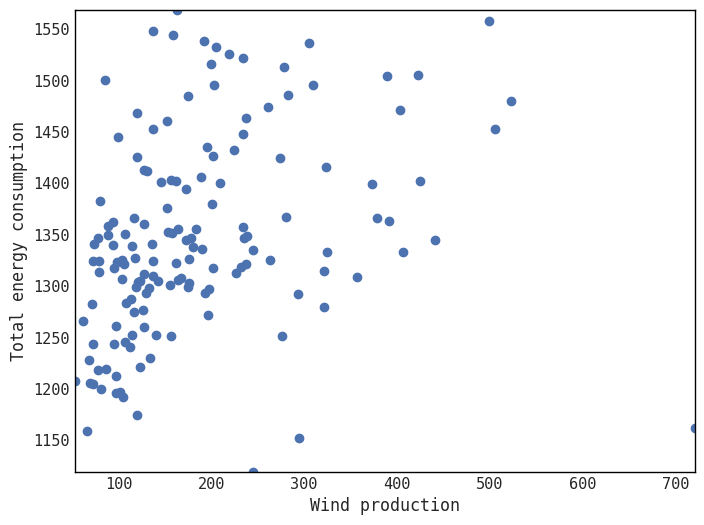

In [ ]:
# Represent with an appropriate graph the correlation between Wind and Consumption time courses
plt.scatter(T['Wind'],T['Consumption'])
plt.xlabel('Wind production')
plt.ylabel('Total energy consumption');

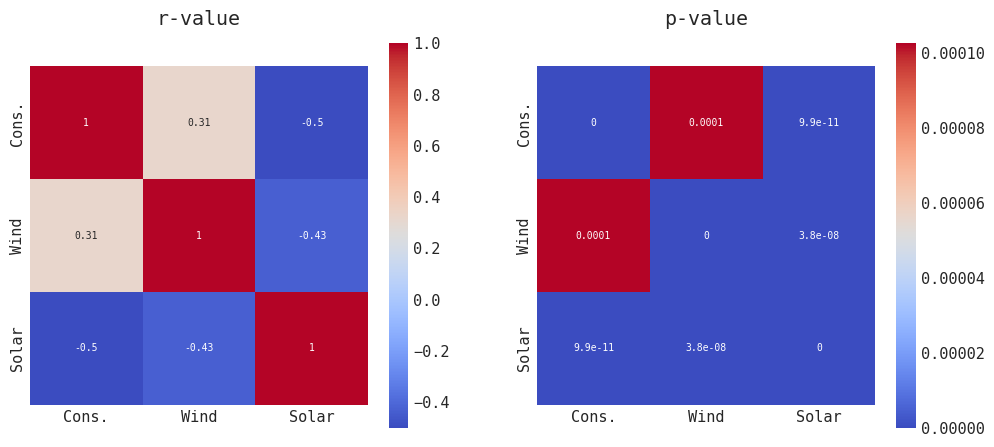

In [ ]:
# Calculate two matrices (dimension=3x3), one representing the Pearson correlation coefficient values for each pair of signals
# and the other one the corresponding p-values. Visualise both of them with appropriate graphs
mat_coeff = []
mat_pval = []
for i in list(range(0,3)):
  row_coeff = []
  row_pval = []
  for j in list(range(0,3)):
      temp = stats.pearsonr(T.iloc[:,i],T.iloc[:,j])
      row_coeff.append(temp[0])
      row_pval.append(temp[1])
  mat_coeff.append(row_coeff)
  mat_pval.append(row_pval)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(mat_coeff, annot=True, cmap = 'coolwarm', square=True,ax=axes[0],annot_kws={"size":7}, xticklabels=['Cons.','Wind','Solar'], yticklabels=['Cons.','Wind','Solar'])
axes[0].set_title('r-value')
sns.heatmap(mat_pval, annot=True, cmap = 'coolwarm',  square=True,ax=axes[1],annot_kws={"size":7}, xticklabels=['Cons.','Wind','Solar'], yticklabels=['Cons.','Wind','Solar'])
axes[1].set_title('p-value');

# **4 ------------------------------------------------**

In [ ]:
# Example - Simulated scenario
trend = list(range(10,110))
cycle = np.sin(trend) * 0.3 * trend
tseries = trend + cycle
plt.plot(tseries,color='black')
plt.grid()
plt.title('Original Signal')

# Logarithm
tseries_log = np.log(tseries)

# Box-Cox
tseries_box_cox_man = stats.boxcox(tseries, lmbda=0.4)
[tseries_box_cox_auto, opt_lambda] = stats.boxcox(tseries) # it uses a lambda value that maximizes the log-likelihood

# Visualization of the results
fig,axes = plt.subplots(1,3,figsize=(20,5))
axes[0].grid()
axes[0].plot(tseries_log,color='red')
axes[0].set_title('Log transformation')

axes[1].plot(tseries_box_cox_man,color='green')
axes[1].grid()
axes[1].set_title('Box-cox transformation lambda 0.4')

axes[2].plot(tseries_box_cox_auto,color='blue')
axes[2].grid()
axes[2].set_title('Box-cox transformation optimised lambda '+str(opt_lambda));

# Note: A good value of lambda is one which makes the size of the seasonal variation about the same for the whole series, as this makes the forecasting model simpler


In [ ]:
# Example: Moving average of order 5
plt.style.use('seaborn')

Elec_data = pd.read_csv('/content/Electricity_Australia.csv',sep=';',parse_dates=['Year'], index_col='Year')
Elec_data['5-MA'] = Elec_data['Sales (GWh)'].rolling(5, center=True).mean()
Elec_data

# Note: if center = True, the resulting value will be placed in the middle, while if center = False it will be placed at the end of the considered period

Sales (GWh)      5-MA
Year                             
1989-01-01      2354.34       NaN
1990-01-01      2379.71       NaN
1991-01-01      2318.52  2381.530
1992-01-01      2468.99  2424.556
1993-01-01      2386.09  2463.758
1994-01-01      2569.47  2552.598
1995-01-01      2575.72  2627.700
1996-01-01      2762.72  2750.622
1997-01-01      2844.50  2858.348
1998-01-01      3000.70  3014.704
1999-01-01      3108.10  3077.300
2000-01-01      3357.50  3144.520
2001-01-01      3075.70  3188.700
2002-01-01      3180.60  3202.320
2003-01-01      3221.60  3216.940
2004-01-01      3176.20  3307.296
2005-01-01      3430.60  3398.754
2006-01-01      3527.48  3485.434
2007-01-01      3637.89       NaN
2008-01-01      3655.00       NaN

In [ ]:
# Visualization of 5-MA
plt.figure(figsize=(6,4))
plt.plot(Elec_data['Sales (GWh)'],'b-',label = 'Original data', linewidth=2 )
plt.plot(Elec_data['5-MA'],'r-',label = '5-MA', linewidth=2)
plt.legend()
plt.xlabel('Year')
plt.ylabel('GWh');

In [ ]:
Elec_data['3-MA'] = Elec_data['Sales (GWh)'].rolling(3, center=True).mean()
Elec_data['7-MA'] = Elec_data['Sales (GWh)'].rolling(7, center=True).mean()
Elec_data['9-MA'] = Elec_data['Sales (GWh)'].rolling(9, center=True).mean()

fig, ax = plt.subplots(2,2,figsize=(12,8))
ax[0,0].plot(Elec_data['Sales (GWh)'],'b-',label = 'Original data', linewidth=2)
ax[0,0].plot(Elec_data['3-MA'],'r-',label = '3-MA', linewidth=2)
ax[0,0].legend()
ax[0,0].set_xlabel('Year')
ax[0,0].set_ylabel('GWh');

ax[0,1].plot(Elec_data['Sales (GWh)'],'b-',label = 'Original data', linewidth=2)
ax[0,1].plot(Elec_data['5-MA'],'r-',label = '5-MA', linewidth=2)
ax[0,1].legend()
ax[0,1].set_xlabel('Year')
ax[0,1].set_ylabel('GWh');

ax[1,0].plot(Elec_data['Sales (GWh)'],'b-',label = 'Original data', linewidth=2)
ax[1,0].plot(Elec_data['7-MA'],'r-',label = '7-MA', linewidth=2)
ax[1,0].legend()
ax[1,0].set_xlabel('Year')
ax[1,0].set_ylabel('GWh');

ax[1,1].plot(Elec_data['Sales (GWh)'],'b-',label = 'Original data', linewidth=2)
ax[1,1].plot(Elec_data['9-MA'],'r-',label = '9-MA', linewidth=2)
ax[1,1].legend()
ax[1,1].set_xlabel('Year')
ax[1,1].set_ylabel('GWh');

In [ ]:
# Example: Moving Average of order 4
Test = {'Period':list(range(1,8)), 'Value':[9,8,9,12,9,12,11]}
df = pd.DataFrame(Test)
df['4-MA_Wrong'] = df['Value'].rolling(4, center=True).mean()
df['2x4-MA_Correct'] = df['Value'].rolling(4, center=True).mean().rolling(2).mean().shift(-1)
df

# Correct version: MA for 1:4, MA for 2:5 and then average of these two values. The same for the other windows.

Period  Value  4-MA_Wrong  2x4-MA_Correct
0       1      9         NaN             NaN
1       2      8         NaN             NaN
2       3      9         9.5            9.50
3       4     12         9.5           10.00
4       5      9        10.5           10.75
5       6     12        11.0             NaN
6       7     11         NaN             NaN

In [ ]:
# Example: Moving average of order 4  on real data
Elec_data = pd.read_csv('/content/Electricity_Australia.csv',sep=';',parse_dates=['Year'])
Elec_data = Elec_data.set_index('Year')
Elec_data['4-MA_Wrong'] = Elec_data.rolling(4, center=True).mean()
Elec_data['2x4-MA_Correct'] = Elec_data['Sales (GWh)'].rolling(4, center=True).mean().rolling(2).mean().shift(-1)
Elec_data

Sales (GWh)  4-MA_Wrong  2x4-MA_Correct
Year                                               
1989-01-01      2354.34         NaN             NaN
1990-01-01      2379.71         NaN             NaN
1991-01-01      2318.52   2380.3900      2384.35875
1992-01-01      2468.99   2388.3275      2412.04750
1993-01-01      2386.09   2435.7675      2467.91750
1994-01-01      2569.47   2500.0675      2536.78375
1995-01-01      2575.72   2573.5000      2630.80125
1996-01-01      2762.72   2688.1025      2742.00625
1997-01-01      2844.50   2795.9100      2862.45750
1998-01-01      3000.70   2929.0050      3003.35250
1999-01-01      3108.10   3077.7000      3106.60000
2000-01-01      3357.50   3135.5000      3157.98750
2001-01-01      3075.70   3180.4750      3194.66250
2002-01-01      3180.60   3208.8500      3186.18750
2003-01-01      3221.60   3163.5250      3207.88750
2004-01-01      3176.20   3252.2500      3295.61000
2005-01-01      3430.60   3338.9700      3391.00625
2006-01-01      3527.48   3443.0425      3502.89250
2007-01-01      3637.89   3562.7425             NaN
2008-01-01      3655.00         NaN             NaN

In [ ]:
# Example: Classical decomposition with Python tools
# Airline passenger data
data = pd.read_csv('/content/Airline_passengers.csv',sep=',',parse_dates=['Month'], index_col = 'Month')
plt.plot(data['#Passengers']);
display(data)
display(data.index)

#Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121
...                 ...
1960-08-01          606
1960-09-01          508
1960-10-01          461
1960-11-01          390
1960-12-01          432

[144 rows x 1 columns]

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [ ]:
# Important! Set the frequency, as currently the index is of DatatimeIndex type but with freq=None
# This will be important for the automatic decomposition
data = data.asfreq('MS')
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

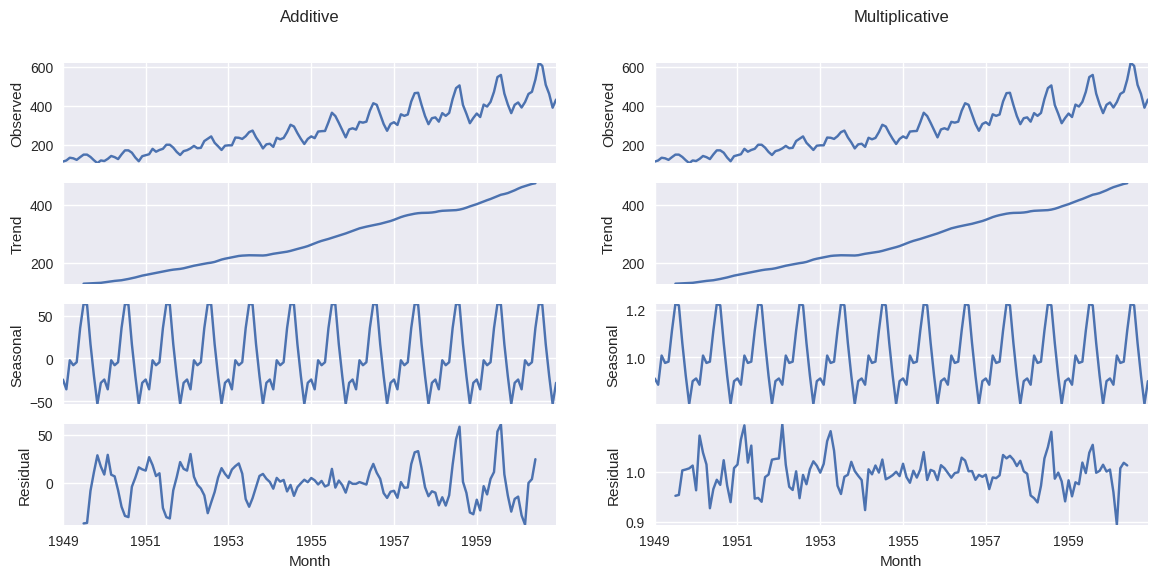

In [ ]:
# Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

# 1. Additive decomposition
decompose_data_add = seasonal_decompose(data, model='additive') # period is automatically set according to the given frequency in the data, and in this case is 12

# 2. Multiplicative decomposition
decompose_data_mul = seasonal_decompose(data, model='multiplicative')

def plotseasonal(res, axes):
    res.observed.plot(ax=axes[0], legend=False)
    axes[0].set_ylabel('Observed')
    res.trend.plot(ax=axes[1], legend=False)
    axes[1].set_ylabel('Trend')
    res.seasonal.plot(ax=axes[2], legend=False)
    axes[2].set_ylabel('Seasonal')
    res.resid.plot(ax=axes[3], legend=False)
    axes[3].set_ylabel('Residual')


fig, axes = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(14,6))
plotseasonal(decompose_data_add, axes[:,0])
axes[0,0].set_title('Additive')
plotseasonal(decompose_data_mul, axes[:,1])
axes[0,1].set_title('Multiplicative');

# Note: if we want to have a quick look at the results we can use the command decompose_data_mul.plot();

In [ ]:
# Note: verify the moving average issue with even numbers -> this is ok using seasonal_decompose()!
temp = data['#Passengers'].rolling(12, center=True).mean().rolling(2).mean().shift(-1)
print(temp.head(10)) # manual implementation

print(decompose_data_mul.trend.head(10)) # automatic implementation

Month
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
1949-06-01           NaN
1949-07-01    126.791667
1949-08-01    127.250000
1949-09-01    127.958333
1949-10-01    128.583333
Freq: MS, Name: #Passengers, dtype: float64
Month
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
1949-06-01           NaN
1949-07-01    126.791667
1949-08-01    127.250000
1949-09-01    127.958333
1949-10-01    128.583333
Freq: MS, Name: trend, dtype: float64


In [ ]:
# STL decomposition on previous data
from statsmodels.tsa.seasonal import STL

# default value for seasonal is 7 -> must be an odd number
stl = STL(data['#Passengers'], seasonal=13) # robust = True to remove effects of outliers on the calculation of trend and seasonal component
res = stl.fit()
res.plot();

# Example

In [ ]:
import numpy as np
import pandas as pd
import math
import statistics
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

# General importing
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Specific importing
from pandas.plotting import lag_plot
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose


In [ ]:
# 1. Load the data
data = pd.read_csv('/content/US_covid19.csv',sep=',',parse_dates=['date'], index_col='date')
display(data.head(7))
display(data.index)

cases  deaths
date                     
2020-01-21      1       0
2020-01-22      1       0
2020-01-23      1       0
2020-01-24      2       0
2020-01-25      3       0
2020-01-26      5       0
2020-01-27      5       0

DatetimeIndex(['2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28',
               '2020-01-29', '2020-01-30',
               ...
               '2021-12-30', '2021-12-31', '2022-01-01', '2022-01-02',
               '2022-01-03', '2022-01-04', '2022-01-05', '2022-01-06',
               '2022-01-07', '2022-01-08'],
              dtype='datetime64[ns]', name='date', length=719, freq=None)

In [ ]:
# Set the frequency
data = data.asfreq('D')
display(data.index)

# Add a new column with the transformation related to the number of new cases (difference operator)
data['new_cases'] = data['cases'].diff()

DatetimeIndex(['2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28',
               '2020-01-29', '2020-01-30',
               ...
               '2021-12-30', '2021-12-31', '2022-01-01', '2022-01-02',
               '2022-01-03', '2022-01-04', '2022-01-05', '2022-01-06',
               '2022-01-07', '2022-01-08'],
              dtype='datetime64[ns]', name='date', length=719, freq='D')

In [ ]:
# 2. Select only a subset of data of interest and plot the results
new_cases = data['new_cases'].loc['2020-04-01':'2021-04-30']
display(new_cases.index)

ax = new_cases.plot(figsize=(15, 5))
ax.set_title('New cases in U.S.',fontweight='bold');

DatetimeIndex(['2020-04-01', '2020-04-02', '2020-04-03', '2020-04-04',
               '2020-04-05', '2020-04-06', '2020-04-07', '2020-04-08',
               '2020-04-09', '2020-04-10',
               ...
               '2021-04-21', '2021-04-22', '2021-04-23', '2021-04-24',
               '2021-04-25', '2021-04-26', '2021-04-27', '2021-04-28',
               '2021-04-29', '2021-04-30'],
              dtype='datetime64[ns]', name='date', length=395, freq='D')

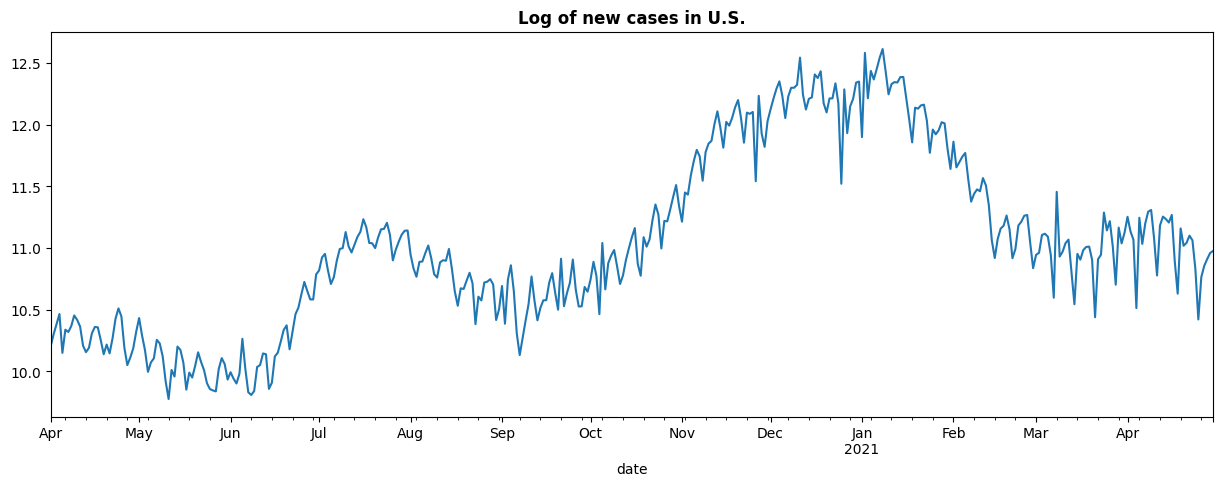

In [ ]:
# 3. Construct the log-transformed data
log_new_cases = np.log(new_cases)

# Plot the transformed series
ax = log_new_cases.plot(figsize=(15, 5))
ax.set_title('Log of new cases in U.S.', fontsize='large', fontweight='bold');

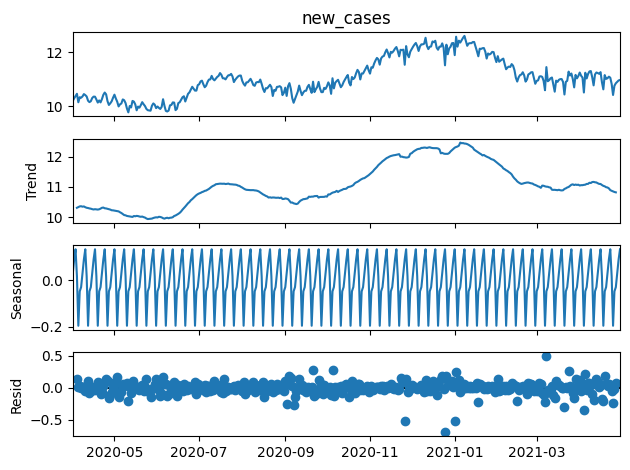

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# 4. Perform classical seasonal decomposition
classical_res = seasonal_decompose(log_new_cases, model='additive')

# Visualise the results
classical_res.plot();

# Extract the trend and seasonal components
classical_trend = classical_res.trend
classical_seasonal = classical_res.seasonal

# Calculate the seasonally-adjusted series
classical_seasonally_adjusted = log_new_cases - classical_res.seasonal

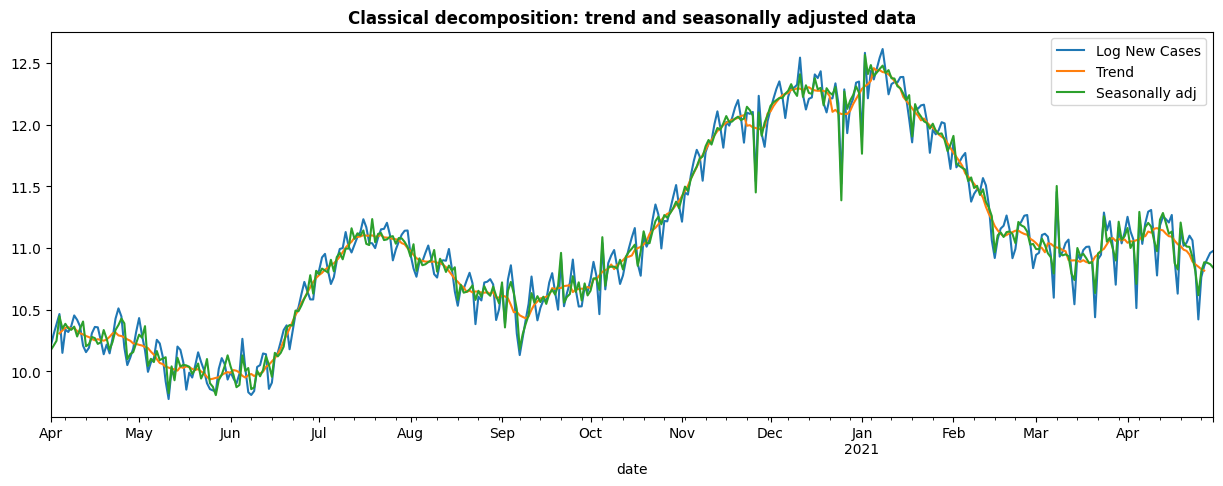

In [ ]:
# 5. Visualize the log-transformed new cases, trend component and seasonally-adjusted data
fig, ax = plt.subplots(figsize=(15, 5))

log_new_cases.plot()
classical_trend.plot()
classical_seasonally_adjusted.plot()
#stl_seasonally_adjusted.plot()
ax.set_title('Classical decomposition: trend and seasonally adjusted data', fontweight='bold');
ax.legend(['Log New Cases','Trend','Seasonally adj']);

In [ ]:
pip install numpy-stl

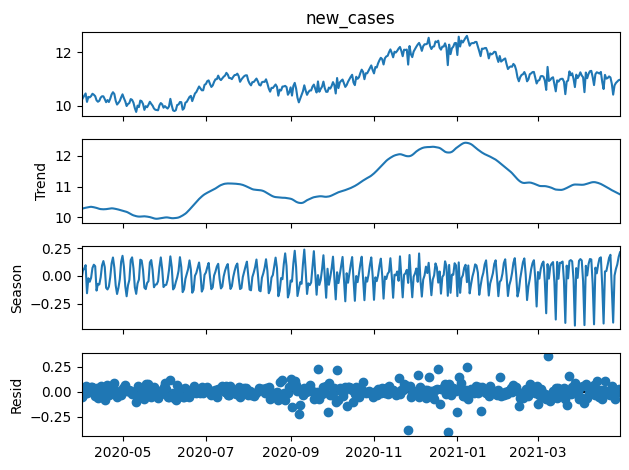

In [ ]:
# 6. Perform STL decomposition and visualise the results
from statsmodels.tsa.seasonal import STL
stl = STL(log_new_cases)
res = stl.fit()
res.plot();

# Extract the trend and seasonal components
stl_trend = res.trend
stl_seasonal = res.seasonal

# Calculate the seasonally-adjusted series
stl_seasonally_adjusted = log_new_cases - stl_seasonal

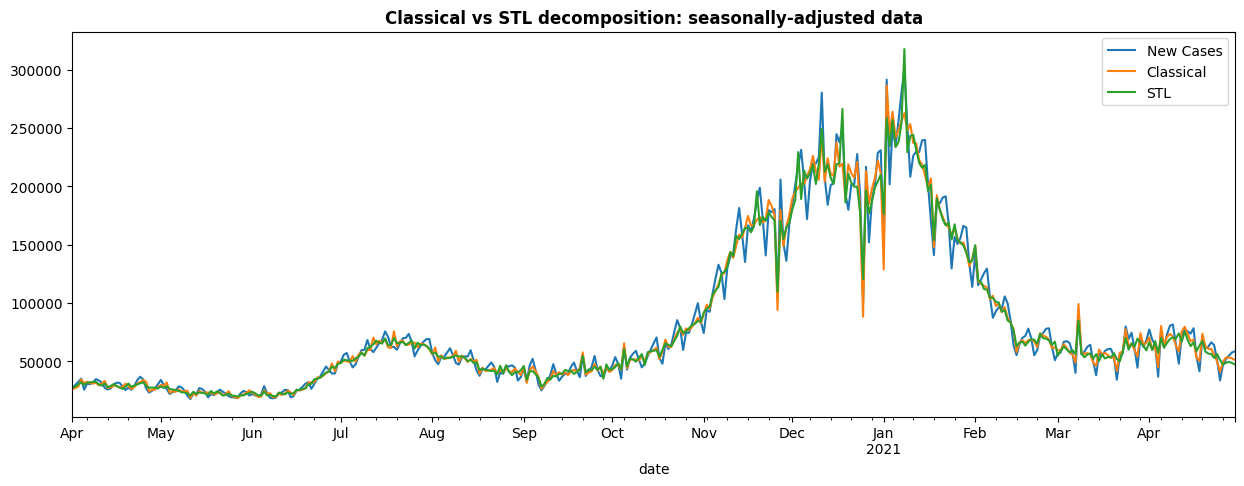

In [ ]:
# 7. Exp to reverse the log transformation. Visualise the new-cases data along with the seasonally-adjusted data derived with classical and STL decompositions
fig, ax = plt.subplots(figsize=(15, 5))

new_cases.plot()
np.exp(classical_seasonally_adjusted).plot()
np.exp(stl_seasonally_adjusted).plot()
ax.set_title('Classical vs STL decomposition: seasonally-adjusted data', fontweight='bold');
ax.legend(['New Cases','Classical','STL']);


In [ ]:
# 8. Calculate the correlation between the two seasonally-adjusted time series
[c,p] = np.corrcoef(classical_seasonally_adjusted,stl_seasonally_adjusted)
print('Correlation is', c[0])

Correlation is 0.9999999999999999


In [ ]:
# Load the data and do the required operations/transformations
data = pd.read_csv('/content/Milk_production.csv',sep=',',parse_dates=['Month'], index_col='Month')
display(data.head(10))
display(data.index)

Monthly milk production (pounds per cow)
Month                                               
1962-01-01                                       589
1962-02-01                                       561
1962-03-01                                       640
1962-04-01                                       656
1962-05-01                                       727
1962-06-01                                       697
1962-07-01                                       640
1962-08-01                                       599
1962-09-01                                       568
1962-10-01                                       577

DatetimeIndex(['1962-01-01', '1962-02-01', '1962-03-01', '1962-04-01',
               '1962-05-01', '1962-06-01', '1962-07-01', '1962-08-01',
               '1962-09-01', '1962-10-01',
               ...
               '1975-03-01', '1975-04-01', '1975-05-01', '1975-06-01',
               '1975-07-01', '1975-08-01', '1975-09-01', '1975-10-01',
               '1975-11-01', '1975-12-01'],
              dtype='datetime64[ns]', name='Month', length=168, freq=None)

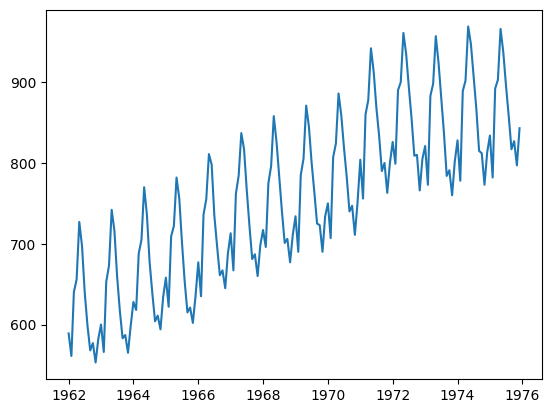

In [ ]:
# Assign frequency
data = data.asfreq('MS')
data.index

# Visualise the original data
plt.plot(data);

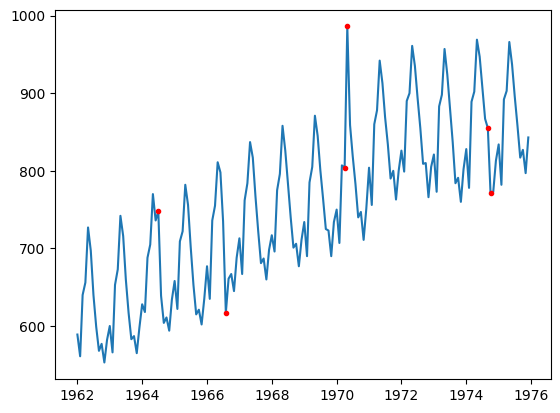

In [ ]:
# 1. Add some outliers (6) by modifying the data, e.g., adding or removing to the value 100
data.iloc[30] = data.iloc[30] + 70
data.iloc[55] = data.iloc[55] - 80
data.iloc[99] = data.iloc[99] - 20
data.iloc[100] = data.iloc[100] + 100
data.iloc[152] = data.iloc[152] + 40
data.iloc[153] = data.iloc[153] - 40

x = [data.index[30],data.index[55],data.index[99],data.index[100],data.index[152],data.index[153]]
y = [data.iloc[30].values, data.iloc[55].values,data.iloc[99].values,data.iloc[100].values,data.iloc[152].values,data.iloc[153].values]

plt.plot(data);
plt.plot(x,y,marker='.',color='r',linestyle='');


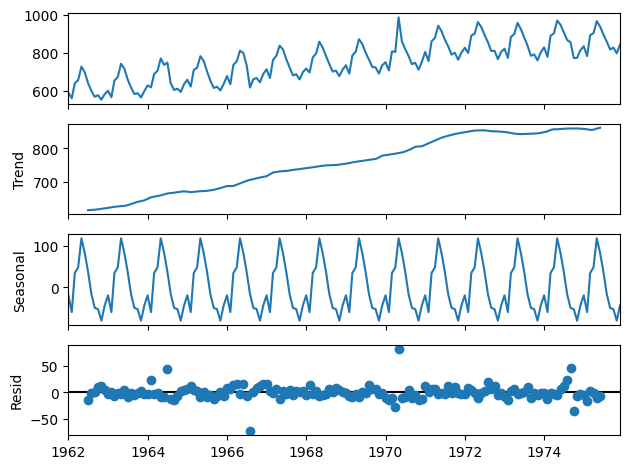

In [ ]:
# 2. Perform the appropriate classical decomposition
classical_res = seasonal_decompose(data, model='additive')

# Visualise the results
classical_res.plot();

# Extract the residual component
classical_residual = classical_res.resid

In [ ]:
# 3. On the residual component, after having removed the NaN (beginning/end), detect any outlier with the IQR and the mean +/- 3*std methods
classical_residual = classical_res.resid
classical_residual.dropna(inplace=True)

# IQR
Q1_py = np.quantile(classical_residual,0.25)
Q3_py = np.quantile(classical_residual,0.75)
IQR = Q3_py-Q1_py
Lower_Fence = Q1_py - 1.5*IQR
Upper_Fence = Q3_py + 1.5*IQR

T = []
for i in classical_residual:
    exp1 = i < Lower_Fence
    exp2 = i > Upper_Fence
    if exp1 or exp2:
       temp = i
       T.append(temp)

print('Number of outliers with IQR:', len(T))

# mean +/- 3*std
mean_val = classical_residual.mean()
std_val = classical_residual.std()
thr = 3*std_val
Lower = mean_val - thr
Upper = mean_val + thr

outliers = [i for i in classical_residual if i < Lower or i > Upper]
print('Number of outliers with mean/std :', len(outliers))


Number of outliers with IQR: 8
Number of outliers with mean/std : 4


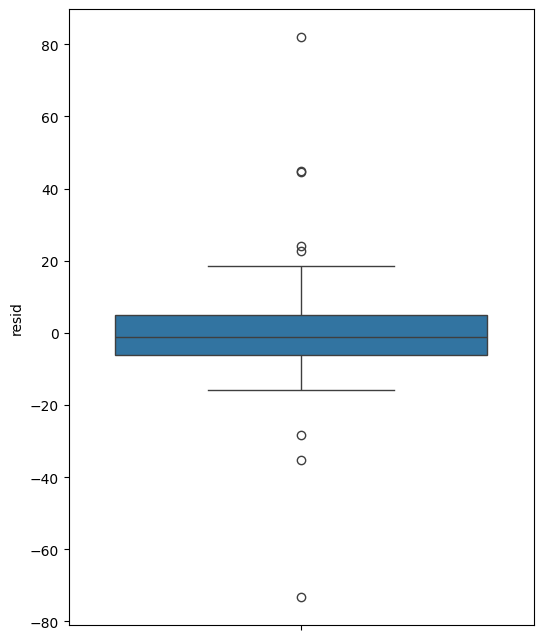

In [ ]:
# 4. Visualise the residual component values with a boxplot
fig, ax = plt.subplots(figsize=(6, 8))
sns.boxplot(y = classical_residual);

# ** 5 ---------------------------------------------**

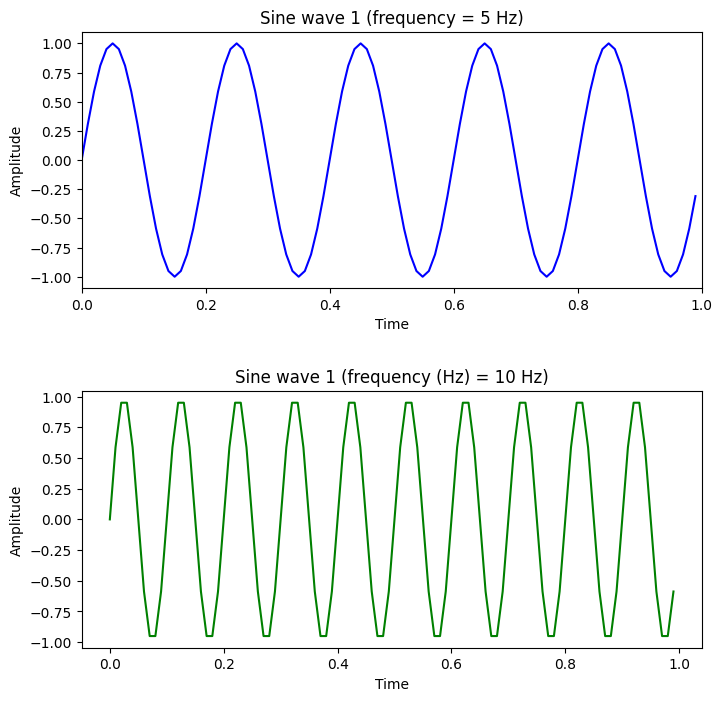

In [ ]:
# Example 1 - Generate two sine waves (1 second each) with frequency of 5 Hz and 10 Hz, respectively, all sampled at Fs = 100 Hz

# Step 1 - Define the main parameters
Fs = 100  # Sampling rate (sampling frequency)
ts = 1/Fs # dt = 0.01, sampling interval
t = np.arange(0,1,ts) # from 0 to 1-ts

freq_s1 = 5 # frequency of the first sine wave
freq_s2 = 10  # frequency of the second sine wave
#T_s1 = 1/freq_s1 # period of the first sine wave, 0.2 sec
#T_s2 = 1/freq_s2 # period of the second sine wave, 0.1 sec

# Step 2 - Create the two sine waves
y_s1 = np.sin(2*np.pi*freq_s1*t)
y_s2 = np.sin(2*np.pi*freq_s2*t)

# Step 3 - Visualise the two functions
fig, axes = plt.subplots(2, 1, figsize=(8, 8))
plt.subplots_adjust(wspace=0.4,hspace=0.4) # To adjust the space between subplots
axes[0].plot(t, y_s1, 'b')
axes[0].set_xlim(0,1)
axes[0].set(xlabel='Time', ylabel='Amplitude');
axes[0].set_title('Sine wave 1 (frequency = ' + str(freq_s1) + ' Hz)');
axes[1].plot(t, y_s2, 'g')
axes[1].set(xlabel='Time', ylabel='Amplitude');
axes[1].set_title('Sine wave 1 (frequency (Hz) = ' + str(freq_s2) + ' Hz)');


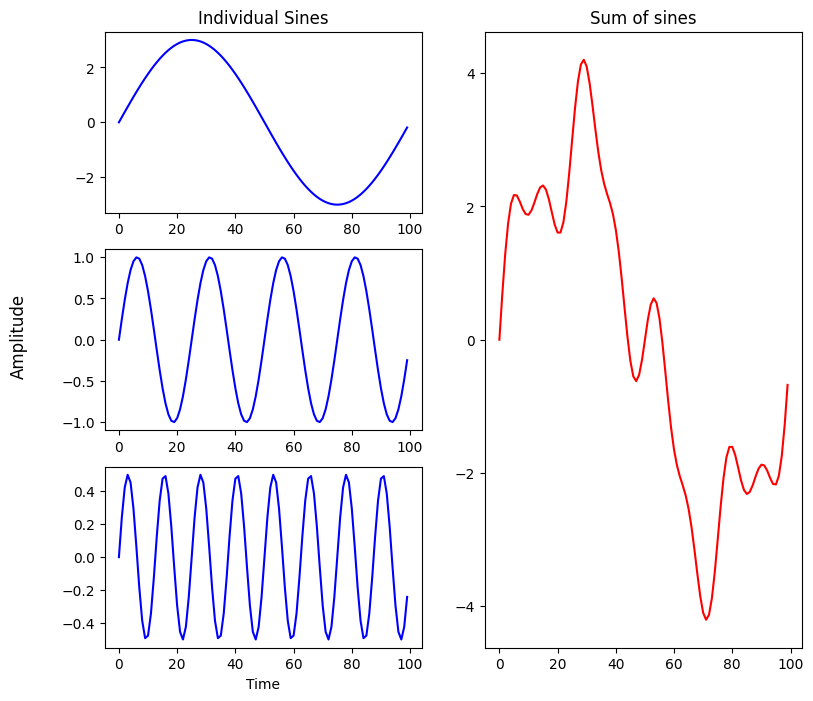

In [ ]:
# Example 2 - Generate a more complex wave, given by the sum of three sines at different frequencies
Fs = 100
ts = 1/Fs
t = np.arange(0,1,ts)

freq_val = np.array([1,4,8])
amplitude = np.array([3,1,0.5])
t = np.arange(0,1,ts)

sine_waves = np.zeros([len(freq_val), len(t)])
for s in range(len(freq_val)):
    sine_waves[s,:] = amplitude[s] * np.sin(2*np.pi*freq_val[s]*t)

fig = plt.figure(figsize=(9,8))
fig.supylabel('Amplitude')

for fi in range(len(freq_val)):
    plt.subplot(3, 2, 2*(fi+1)-1)
    plt.plot(sine_waves[fi,:], color='b')
    if fi == 0:
        plt.title('Individual Sines')
    elif fi == 2:
        ax = plt.gca()
        ax.set_xlabel('Time')

total = np.sum(sine_waves,axis=0)
plt.subplot(122)
plt.plot(total, color='r')
plt.title('Sum of sines');

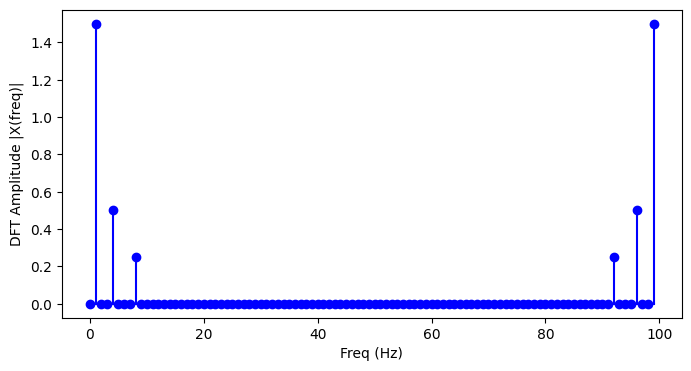

In [ ]:
# To do: Write a function DFT(x) which takes a 1D signal as input (for example the one just created) and returns the DFT values

def DFT(x):
    N = len(x)
    n = np.arange(N) # dim n = (N,)
    k = n.reshape((N, 1)) # dim k = (N,1). Note: k*n has dimension = N*N
    e = np.exp(-2j * np.pi * k * n / N) # N*N as dimension
    X = np.dot(e, x)
    return(X)

X = DFT(total)

# calculate the frequency vector
N = len(X)
freq_step = Fs/N; # frequency step
freq_vec = np.arange(0,Fs,freq_step) # frequency vector

# Visualize the module of the estimated coefficients
plt.figure(figsize = (8, 4))
plt.stem(freq_vec, abs(X)/N,'b', basefmt="-b",use_line_collection=True) # The normalization by the number of samples allows to recover the true amplitude
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|');

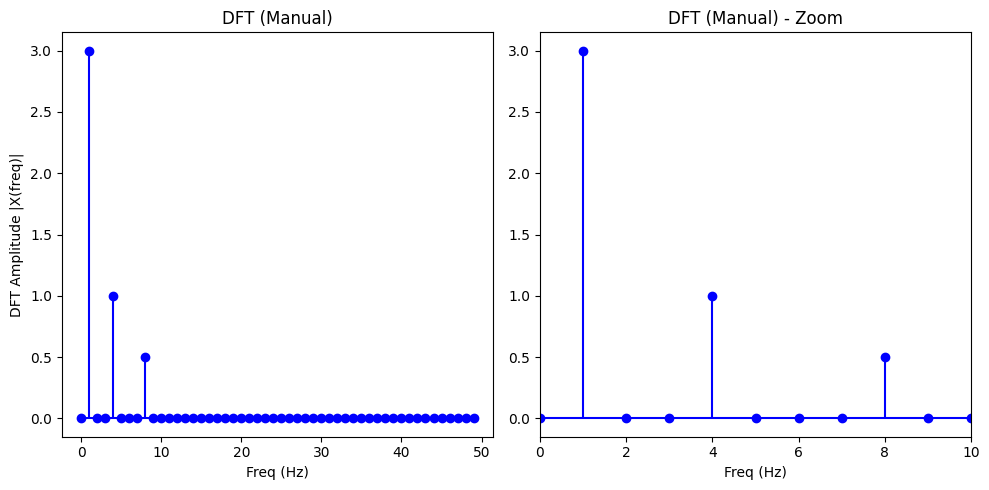

In [ ]:
# From above we can take only half of the points, as DFT is symmetric
freq_half = freq_vec[:(N//2)]

# A normalization step can be applied to the the amplitude (usually X/N, thus by the number of sample points. In this case N/2 as we are considering half of the points)
# This allows to return a FFT amplitude equal to the amplitude of the original signal
X_half =X[:(N//2)]

plt.figure(figsize = (10, 5))
plt.subplot(121)
plt.stem(freq_half, abs(X_half)/(N//2), 'b', basefmt="-b",use_line_collection=True)
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.title('DFT (Manual)')

plt.subplot(122)
plt.stem(freq_half, abs(X_half)/(N//2), 'b', basefmt="-b",use_line_collection=True)
plt.xlabel('Freq (Hz)')
plt.xlim(0, 10)
plt.tight_layout()
plt.title('DFT (Manual) - Zoom');

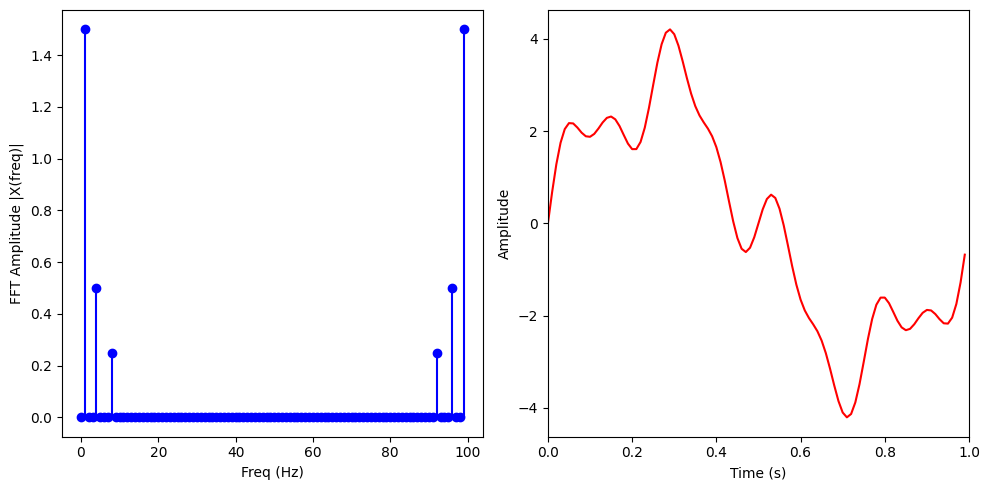

In [ ]:
# Numpy implementation
from numpy.fft import fft, ifft

# Calculate DFT with FFT
X = fft(total) # compute the 1D DFT
N = len(X)
freq_step = Fs/N;
freq_vec = np.arange(0,Fs,freq_step)

plt.figure(figsize = (10, 5))
plt.subplot(121)

plt.stem(freq_vec, np.abs(X)/N, 'b', basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
#plt.xlim(0, 10) # to visualise only the initial portion

# Inverse transformation of the DFT
plt.subplot(122)
plt.plot(t, ifft(X), 'r') # compute the 1D inverse DFT
plt.xlim([0,1])
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout();

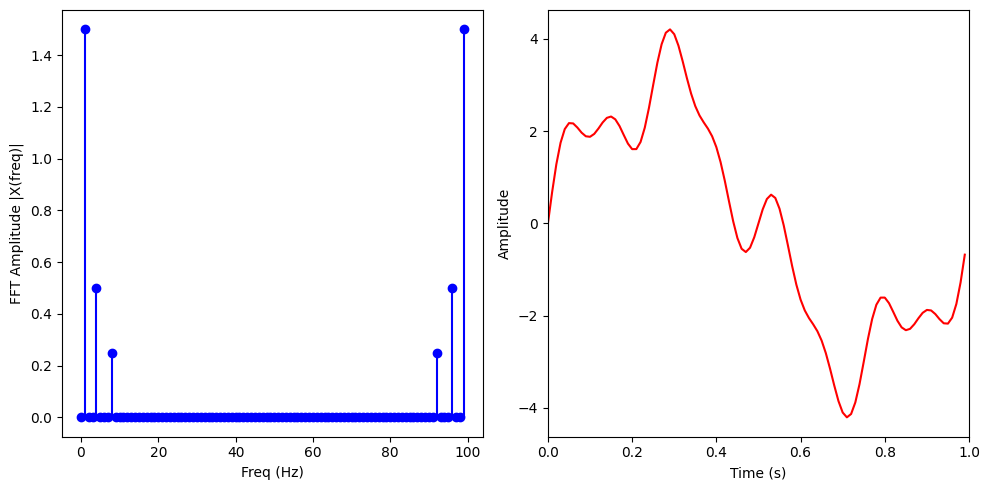

In [ ]:
# Scipy implementation
from scipy.fft import fft, ifft, fftshift, ifftshift

X = fft(total)
N = len(X)
freq_step = Fs/N;
freq_vec = np.arange(0,Fs,freq_step)

plt.figure(figsize = (10, 5))
plt.subplot(121)
plt.stem(freq_vec, np.abs(X)/N, 'b', basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')

plt.subplot(122)
plt.plot(t, ifft(X), 'r')
plt.xlim([0,1])
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout();

In [ ]:
# Important Note - Effect of zero padding
# It is possible calculate the fft on a larger number of samples (this is the same as padding the original signal with zeros) while keeping fix Fs.
# This would allow to increase the frequency step.
Fs = 300 # sampling frequency
fsig = 10 # frequency of the signal
ts = 1/Fs
t = np.arange(0,1,ts)

Amp = 1
signal_s1 = Amp*np.sin(2*np.pi*fsig*t) # we can replace with cos if a cosine wave is desired
plt.plot(t,signal_s1)
plt.title('Signal - Time')
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude');

# FFT on the original signal and visualisation of the amplitude spectrum
X = fft(signal_s1)
N = len(X)
freq_step = Fs/N;
freq_vec = np.arange(0,Fs,freq_step)

fig1, ax = plt.subplots(1,2,figsize=(12, 5))
ax[0].plot(freq_vec,abs(X)/len(signal_s1))
ax[0].set_title('Amplitude Spectrum')
ax[0].set(xlabel='Frequency (Hz)', ylabel='FFT Amplitude |X(freq)|');

# Zero padding, with 1024 total points
NFFT = 1024 # number of points to calculate DFT
Xpad = fft(signal_s1, NFFT)
Npad = len(Xpad)
freq_step = Fs/Npad # updated frequency step
freq_vec = np.arange(0,Fs,freq_step) # new frequency vector

ax[1].plot(freq_vec,abs(Xpad)/len(signal_s1))
ax[1].set_title('Amplitude Spectrum - Padding ')
ax[1].set(xlabel='Frequency (Hz)', ylabel='FFT Amplitude |X(freq)|');

l, b, h, w = 0.65, 0.5, .2, .2
ax[1] = fig1.add_axes([l, b, w, h])
ax[1].plot(freq_vec,abs(Xpad)/len(signal_s1), 'g')
ax[1].set_xlim(0,50);
ax[1].set_title('Zoom')
ax[1].set(xlabel='Hz');

# This operation allows to obtain an accurate estimate of the amplitude of a sinusoidal signal.

In [ ]:
# In some cases, it might be useful to reorder the frequencies, i.e. shift the zero-frequency component to the center of the spectrum
Fs_max = Fs/2;  # Nyquist frequency
freq_step = Fs/Npad;
freq_vec_center = np.arange(-Fs_max, Fs_max,freq_step)
Xpad_shift = fftshift(Xpad)

fig2, ax = plt.subplots(1,2,figsize=(12, 5),sharey=True)
ax[0].plot(freq_vec_center,abs(Xpad_shift)/len(signal_s1))
ax[0].set_title('Amplitude Spectrum - with FFTShift')
ax[0].set(xlabel='Frequency (Hz)', ylabel='FFT Amplitude |X(freq)|');

ax[1].plot(freq_vec_center,abs(Xpad_shift)/len(signal_s1))
ax[1].set_title('Amplitude Spectrum - with FFTShift [Zoom]')
ax[1].set(xlabel='Frequency (Hz)', ylabel='FFT Amplitude |X(freq)|');
ax[1].set_xlim(-40,40);

# For reconstructing the signal: ifft(ifftshift(Xpad_shift))


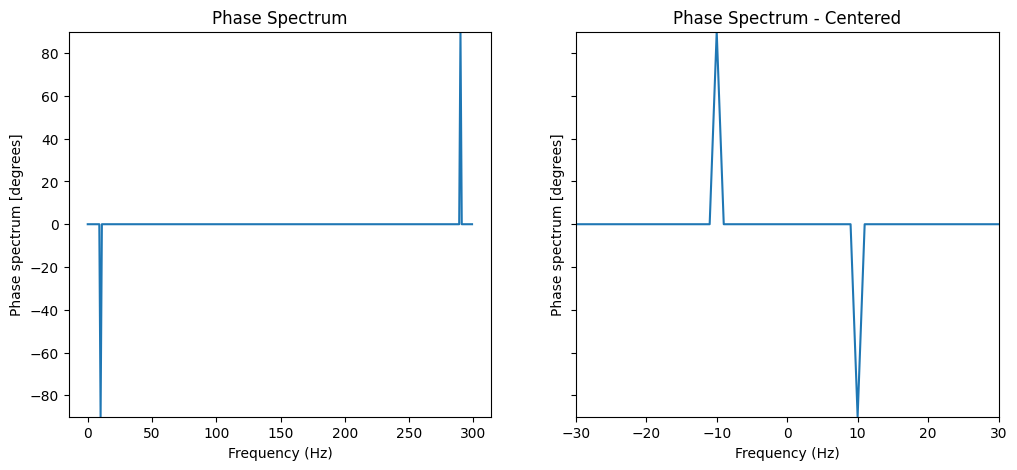

In [ ]:
# Phase Spectrum
X = fft(signal_s1)
N = len(X)
freq_step = Fs/N;
freq_vec = np.arange(0,Fs,freq_step)
freq_vec_center = np.arange(-Fs/2, Fs/2,freq_step)
th = 1e-6;
X[abs(X) < th] = 0; # to clean the spectrum
phase_spect = np.angle(X)

fig2, ax = plt.subplots(1,2,figsize=(12, 5),sharey=True)
ax[0].plot(freq_vec,180*(phase_spect)/np.pi)
ax[0].set_title('Phase Spectrum')
ax[0].set(xlabel = 'Frequency (Hz)', ylabel = 'Phase spectrum [degrees]', ylim=[-90,90])

ax[1].plot(freq_vec_center,180*(fftshift(phase_spect))/np.pi)
ax[1].set_title('Phase Spectrum - Centered')
ax[1].set(xlabel = 'Frequency (Hz)', ylabel = 'Phase spectrum [degrees]', xlim = [-30,30], ylim=[-90,90]);

Total power: 0.5


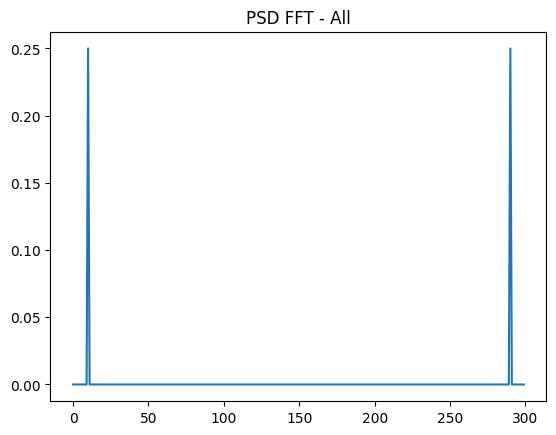

In [ ]:
# Manual PSD - Entire number of points
Amp = 1
signal_s1 = Amp*np.sin(2*np.pi*fsig*t)

Fs = 300
X = fft(signal_s1)
N = len(X)
freq_step = Fs/N
freq_vec = np.arange(0,Fs,freq_step)
df =  freq_step

scale = 1/(N*Fs)
power =  scale*(abs(X**2)) #dim = (300,1)
plt.plot(freq_vec, power)
plt.title('PSD FFT - All')
print('Total power:', np.sum(power)*df)

# np.mean(signal_s1**2) --> Mean Square Signal (also equal to Amp**2/2). The total power should be equal to this value

Total power: 0.5


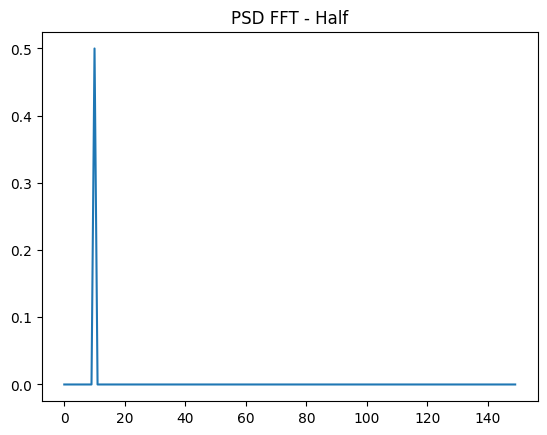

In [ ]:
# Manual PSD - Half of the points
scale = 1/((N//2)*Fs)
power = scale*(abs(X**2))
plt.plot(freq_vec[:(N//2)], power[:(N//2)])
plt.title('PSD FFT - Half')
print('Total power:', np.sum(power[:(N//2)])*df)

In [ ]:
# Windows: boxcar, triang, blackman, hamming, hann, bartlett, flattop, parzen, bohman, blackmanharris,
# nuttall, barthann, kaiser (needs beta), gaussian (needs std), general_gaussian (needs power, width),
# slepian (needs width), chebwin (needs attenuation)
from scipy import stats,signal
A = signal.get_window('triang', 300)
plt.plot(A)
plt.title('Window');



Total sum Density: 0.5


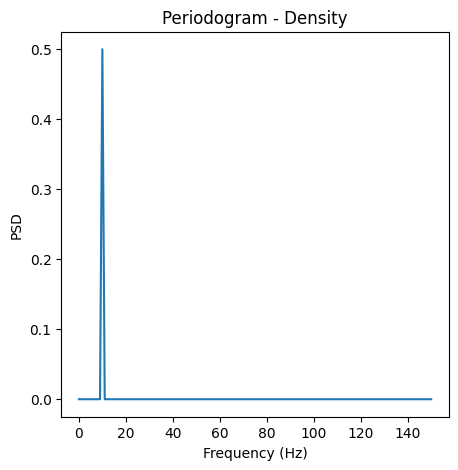

In [ ]:
f_per_density, Pxx_per_density = signal.periodogram(signal_s1,Fs,detrend=False,window='boxcar',nfft=None,return_onesided=True,scaling='density')

# Note: this inside calls the welch function, without overlapping:
# return welch(x, fs, window, nperseg, 0, nfft, detrend, return_onesided, scaling, axis)
# When nfft = None, the number of points is equal to the len(signal)
# Help of the welch function:
# scipy.signal.welch(x, fs=1.0, window='hann', nperseg=None, noverlap=None, nfft=None, detrend='constant', return_onesided=True, scaling='density', axis=- 1, average='mean')

# Note: dimensions are different compared to the manual PSD

fig1, ax = plt.subplots(1,1,figsize=(5,5))
df =  f_per_density[1]-f_per_density[0]
ax.plot(f_per_density, Pxx_per_density)
ax.set_title('Periodogram - Density')
ax.set(xlabel='Frequency (Hz)', ylabel='PSD');

print('Total sum Density:', Pxx_per_density.sum()*df)

In [ ]:
win = Fs

f_welch_density, Pxx_welch_density = signal.welch(signal_s1,Fs, window='boxcar', noverlap=None, nperseg=win, return_onesided=True, scaling='density')
# nperseg = length of each segment
# noverlap = If None, noverlap = nperseg // 2.

fig2, ax = plt.subplots(1,1,figsize=(12, 6))
ax.plot(f_welch_density, Pxx_welch_density)
ax.set_title('Welch - Density')
ax.set(xlabel='Frequency (Hz)', ylabel='PSD');
df_welch = f_welch_density[1] - f_welch_density[0]
P_welch = np.sum(Pxx_welch_density) * df_welch
print('Total sum Density:', P_welch)


Total sum Density: 0.5


# Example

In [ ]:
# Load the data and do all the conversions required
sun_data = pd.read_csv('/content/monthly_sunspots.csv',sep=';',parse_dates=['Month'], index_col = 'Month')
sun_data = sun_data.asfreq('MS')
display(sun_data)

Sunspots
Month               
1749-01-01      58.0
1749-02-01      62.6
1749-03-01      70.0
1749-04-01      55.7
1749-05-01      85.0
...              ...
1983-08-01      71.8
1983-09-01      50.3
1983-10-01      55.8
1983-11-01      33.3
1983-12-01      33.4

[2820 rows x 1 columns]

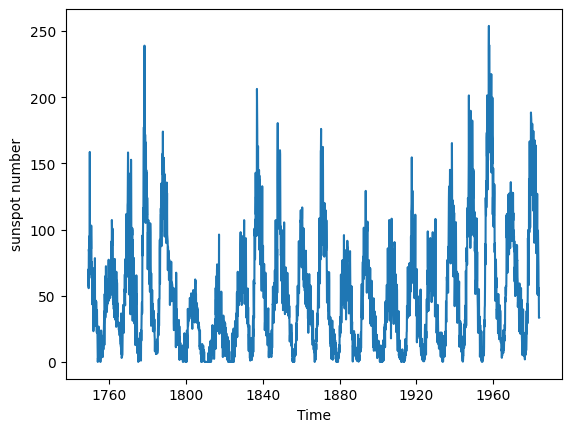

In [ ]:
# Visualise the sunspots data
signal_sun = sun_data['Sunspots']
plt.plot(sun_data.index,signal_sun)
plt.xlabel('Time')
plt.ylabel('sunspot number');

In [ ]:
# FFT and Amplitude Spectrum
Fs = 1 # sampling frequency, our unit of measure is "months" (Important!)
X = fft(signal_sun.values)
N = len(X)
freq_step = Fs/N;
freq_vec = np.arange(0,Fs,freq_step)

ampl = np.abs(X[1:])/N # Start from 1 to remove the zero frequency component, called DC
freq_vec = freq_vec[1:]
plt.plot(freq_vec,ampl)
plt.title('Double Sided FFT ')
plt.xlabel('Frequency')
plt.ylabel('FFT Amplitude |X(freq)|');

In [ ]:
# PSD using the raw periodogram
f_per, Pxx_per = signal.periodogram(signal_sun,Fs,detrend=False,window='boxcar',return_onesided=True,scaling='density')
f_per = f_per[1:]
Pxx_per = Pxx_per[1:]

plt.plot(f_per, Pxx_per)
plt.xlabel('Frequency (cycles/months)')
plt.ylabel('PSD');
temp = np.where(Pxx_per == Pxx_per.max())
print('Frequency for the maximum value is: ',float(f_per[temp]))
print('Period (months/cycle): ',float(1/f_per[temp]))

Frequency for the maximum value is:  0.007446808510638298
Period (months/cycle):  134.28571428571428


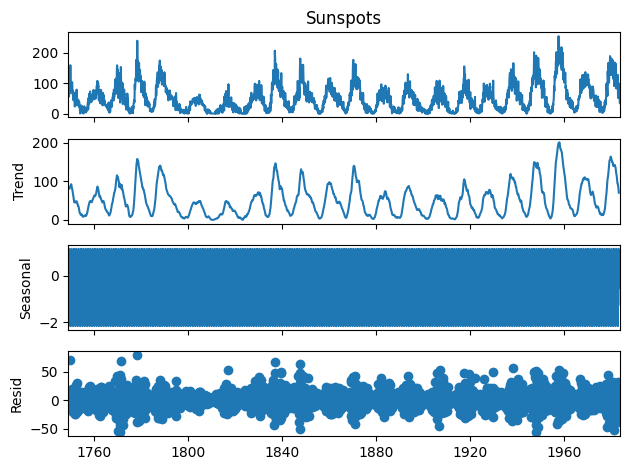

In [ ]:
# Recall from Lesson 4
from statsmodels.tsa.seasonal import seasonal_decompose

# Apply an additive decomposition and visualise all the components.
decompose_data_add = seasonal_decompose(signal_sun, model='additive', period = 12) # period was automatically set to 12, considering the monthly data
decompose_data_add.plot()
plt.show()

# Important to check the frequency content to help setting the correct period/frequency parameter in the decomposition!

In [ ]:
# Load EEG data
data = np.loadtxt('/content/EEG_data.txt')
Fs = 100 # Hz

In [ ]:
data

array([-31.14010682, -29.30774113, -27.70228296, ...,  29.30581425,
        28.57226907,  22.61510519])

In [ ]:
# How long was this EEG recording, in terms of number of points and seconds? Once derived this information, plot the time course using the appropriate x-axis
N = data.shape[0]
dt = 1/Fs
duration = N/Fs
print('The total number of points is', N)
print('The total number of seconds is', duration)

time = np.arange(0,duration,dt)
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
plt.plot(time,data,'k')
plt.xlim(0,30)
plt.xlabel('Time (seconds)')
plt.ylabel('Voltage')
plt.title ('EEG signal');

The total number of points is 3000
The total number of seconds is 30.0


Frequency for the maximum value (Manual) is:  1.0


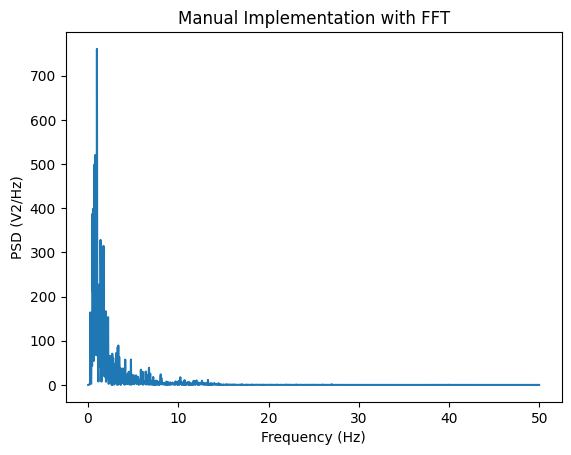

In [ ]:
# Calculate manually the PSD with FFT, considering the one-sided version (half of the points). Which is the frequency corresponding to the max value?
X = fft(data)
N = len(X)
freq_step = Fs/N
scale = 1/((N//2)*Fs) # as we will consider only half of the points
power = scale*(abs(X**2))

freq_vec = np.arange(0,Fs,freq_step)
plt.plot(freq_vec[1:(N//2)], power[1:(N//2)])
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (V2/Hz)')
plt.title('Manual Implementation with FFT')
temp_per = np.where(power[1:(N//2)] == power[1:(N//2)].max())
print('Frequency for the maximum value (Manual) is: ',float(freq_vec[1:N//2][temp_per]))

Frequency for the maximum value (Welch) is:  1.0
Frequency for the maximum value (Periodogram) is:  1.0


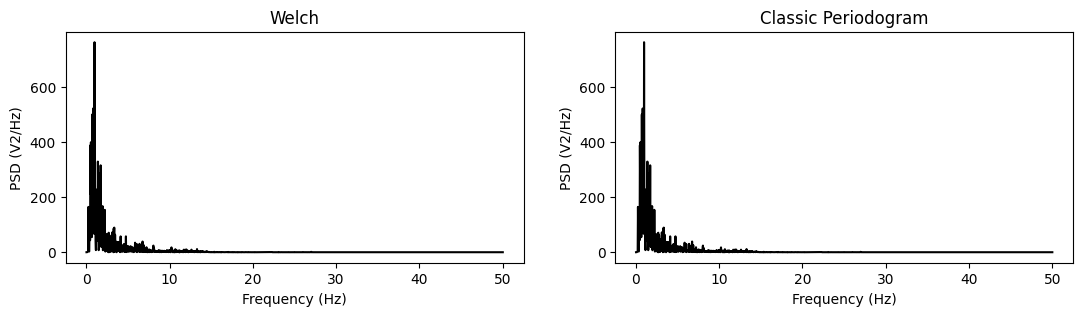

In [ ]:
# Use Welch's and classic periodogram for PSD calculations. Which is the frequency corresponding to the max value, with these two methods?
# Explore different options for the parameters, such as windows

win = len(data)# try different values
f_welch_density, Pxx_welch_density = signal.welch(data,Fs, window='boxcar', nperseg=win, return_onesided=True, scaling='density')
f_welch_density = f_welch_density[1:]
Pxx_welch_density = Pxx_welch_density[1:]

f_per_density, Pxx_per_density = signal.periodogram(data,Fs,detrend=False,window='boxcar',nfft=None,return_onesided=True,scaling='density')
f_per_density = f_per_density[1:]
Pxx_per_density = Pxx_per_density[1:]

fig, ax = plt.subplots(1, 2, figsize=(13, 3))
ax[0].plot(f_welch_density, Pxx_welch_density,'k')
ax[0].set_xlabel('Frequency (Hz)')
ax[0].set_ylabel('PSD (V2/Hz)');
ax[0].set_title('Welch')

ax[1].plot(f_per_density, Pxx_per_density,'k')
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('PSD (V2/Hz)');
ax[1].set_title('Classic Periodogram')

temp_welch = np.where(Pxx_welch_density == Pxx_welch_density.max())
print('Frequency for the maximum value (Welch) is: ',float(f_welch_density[temp_welch]))

temp_per = np.where(Pxx_per_density == Pxx_per_density.max())
print('Frequency for the maximum value (Periodogram) is: ',float(f_per_density[temp_per]))


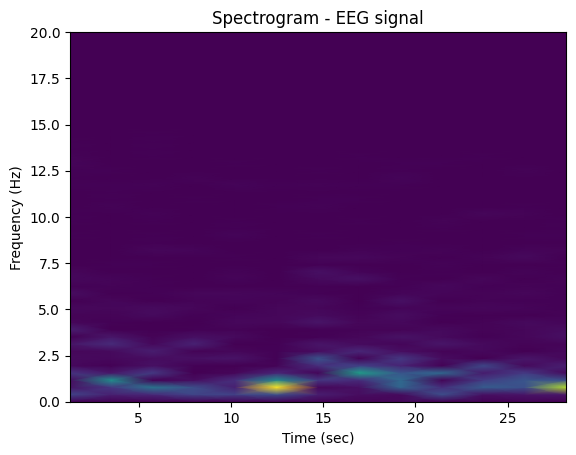

In [ ]:
# Visualise Spectrogram
#plt.style.use('default')
freq, time, Sxx = signal.spectrogram(data, Fs, return_onesided=True)
plt.pcolormesh(time, freq, Sxx,shading='gouraud')
plt.ylim(0,20);
plt.xlabel('Time (sec)')
plt.ylabel('Frequency (Hz)');
plt.title('Spectrogram - EEG signal');

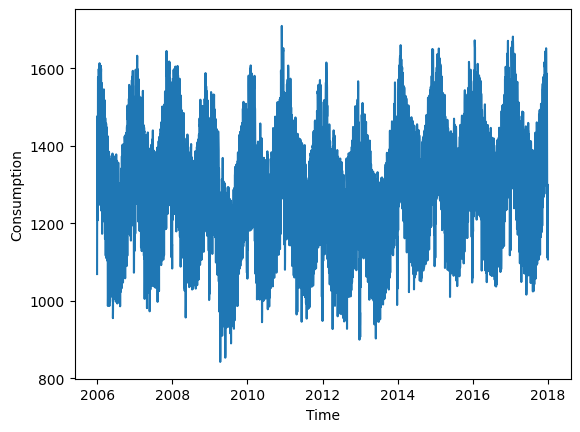

In [ ]:
# Load the data and select the "Total Consumption" as signal of interest. Plot the time course
energy = pd.read_csv('/content/Energy_consumption (1).csv', na_values='',sep=',', parse_dates=['Date'], index_col ='Date')
energy = energy.asfreq('D')
signal_time = energy['Consumption']
plt.plot(signal_time);
plt.xlabel('Time')
plt.ylabel('Consumption');


In [ ]:
energy

Consumption     Wind   Solar  Wind_Solar
Date                                                
2006-01-01   1069.18400      NaN     NaN         NaN
2006-01-02   1380.52100      NaN     NaN         NaN
2006-01-03   1442.53300      NaN     NaN         NaN
2006-01-04   1457.21700      NaN     NaN         NaN
2006-01-05   1477.13100      NaN     NaN         NaN
...                 ...      ...     ...         ...
2017-12-27   1263.94091  394.507  16.530     411.037
2017-12-28   1299.86398  506.424  14.162     520.586
2017-12-29   1295.08753  584.277  29.854     614.131
2017-12-30   1215.44897  721.247   7.467     728.714
2017-12-31   1107.11488  721.176  19.980     741.156

[4383 rows x 4 columns]

In [ ]:
# Derive PSD using the periodogram and identify the periodicities in the data
Fs = 1 # our unit of measures is "days", thus 1 per day
f_per, Pxx_per = signal.periodogram(signal_time,Fs,detrend=None,window='boxcar',return_onesided=True,scaling='density')
plt.plot(f_per[1:],Pxx_per[1:])
plt.xlabel('Frequency [cycles/day]');

peaks = signal.find_peaks(Pxx_per[f_per >=0], prominence=7000000)[0]
peak_freq =  f_per[peaks]
peak_power = Pxx_per[peaks]
plt.plot(peak_freq, peak_power, 'ro');

data = {'Freq': peak_freq, 'Period': 1/peak_freq, 'Power': peak_power}
df = pd.DataFrame(data)
display(df)

Freq      Period         Power
0  0.002738  365.250000  1.915129e+07
1  0.142825    7.001597  4.451036e+07
2  0.285649    3.500799  1.095860e+07

In [ ]:
# Visualize the Consumption time-series for the first month to confirm the pattern revealed by the FFT analysis
import matplotlib.dates as mdates

fig, ax = plt.subplots()
ax.plot(signal_time.index[0:30],signal_time.iloc[0:30],'bo-')
ax.set_xlabel('Time - First Month')
ax.set_ylabel('Total Consumption')

fmt = mdates.DayLocator(interval=7)
ax.xaxis.set_major_locator(fmt);